# Creating Households and Populating them

### Possibly included household characteristics
- Dwellings
- Tenure
- Household spaces
- Residence type
- **Household size**
- Second address ?
- **Household composition**
- **Accomodation type**
- Household space type
- Multiple ethnic group household
- Car or van availability
- Occupancy rating of rooms
- **Dependent children in family**
- **Number of adults in household**
- Number of persons per room
- Dependent children in households with no adults in employment


Starting with one MSOA

## Load in files for use

In [1]:
#asks user for path to Census files on their machine

path = input("Please input path to the Census files folder on your machine.")

input('Press enter to continue...')

Please input path to the Census files folder on your machine.2011 MSOA Data
Press enter to continue...


''

In [2]:
from dataclasses import dataclass
import pandas as pd

@dataclass
class MsoaData:
    """
    Class to hold the names of the census tables for MSOA areas.
    """
    household_size = f"{path}/HHSIZE_MSOAIZ_England_Wales_Descriptions.csv"
    household_comp_accom_type = f"{path}/ACCTYP_URESPOP_MSOAIZ_England_Scotland_Wales_Descriptions.csv"
    household_comp = f"{path}/HHDCOM_MSOAIZ_England_Scotland_Wales_Descriptions.csv"
    age_by_sex = f"{path}/AGE_SEX_MSOAIZ_England_Scotland_Wales_Descriptions.csv"
    communal_res = f"{path}/COMEMT_URESPOP_MSOAIZ_England_Scotland_Wales_Descriptions.csv"
    age_by_sex_by_employment = f"{path}/AGE_ECOACT_HRSWRK_SEX_MSOAIZ_England_Scotland_Wales_Descriptions.csv"
    
def get_employment(csv_file):
    """
    The number of hours that a person aged 16 and over, in employment in the week before the census, 
    worked in their main job. This includes paid and unpaid overtime.

    Full-time working is defined as working 31 hours or more per week, and Part-time working is defined 
    as working 30 hours or less per week.
    """
    return pd.read_csv(csv_file,sep=',',index_col=None,
                      usecols = ['GEO_CODE', 'GEO_LABEL', 
                                 'Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',
                                 'Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',
                                 'Age : Age 22 to 24 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 22 to 24 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 22 to 24 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 22 to 24 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',
                                 'Age : Age 25 to 29 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 25 to 29 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 25 to 29 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 25 to 29 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',
                                 'Age : Age 30 to 34 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 30 to 34 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 30 to 34 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 30 to 34 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',
                                 'Age : Age 35 to 39 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 35 to 39 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 35 to 39 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 35 to 39 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',
                                 'Age : Age 40 to 44 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 40 to 44 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 40 to 44 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 40 to 44 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',                    
                                 'Age : Age 45 to 49 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 45 to 49 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 45 to 49 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 45 to 49 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',                                 
                                 'Age : Age 50 to 54 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 50 to 54 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 50 to 54 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 50 to 54 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',                                 
                                 'Age : Age 55 to 59 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 55 to 59 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 55 to 59 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 55 to 59 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',                                 
                                 'Age : Age 60 to 64 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 60 to 64 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 60 to 64 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 60 to 64 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons',                                    
                                 'Age : Age 65 and over - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons','Age : Age 65 and over - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons',
                                 'Age : Age 65 and over - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons','Age : Age 65 and over - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons'])
                                 
def get_communal_res(csv_file):
    '''
    Dataset population: Residents in communal establishments
    Communal establishments:
    A communal establishment is an establishment providing managed residential accommodation. 
    'Managed' in this context, means full-time or part-time supervision of the accommodation.
    '''
    return pd.read_csv(csv_file,sep=',',index_col=None,
                      usecols = ['GEO_CODE', 'GEO_LABEL',
                                 'Communal establishment management and type : Total\ Communal establishment management and type - Population (usual residents) : All usual residents in communal establishments (including people enumerated as sleeping rough. Residents who are staff or owner; and partners of staff or owner are not included for Scotland but are included for England and Wales; and Northern Ireland) - Unit : Persons'])
    
def get_age_by_sex(csv_file):
    """
    Dataset population: Persons
    Age:Age is derived from the date of birth question and is a person's age at their last birthday, at 27 March 2011. Dates of birth that imply an age over 115 are treated as invalid and the person's age is imputed. Infants less than one year old are classified as 0 years of age.
    Sex:The classification of a person as either male or female.
    """
    return pd.read_csv(csv_file,sep=',',index_col=None,
                      usecols = ['GEO_CODE', 'GEO_LABEL','Age : Total\ Age - Sex : Total\ Sex - Unit : Persons',
                                 'Age : Total\ Age - Sex : Males - Unit : Persons','Age : Total\ Age - Sex : Females - Unit : Persons',
                                 'Age : Age under 1 - Sex : Males - Unit : Persons','Age : Age under 1 - Sex : Females - Unit : Persons',
                                 'Age : Age 1 - Sex : Males - Unit : Persons','Age : Age 1 - Sex : Females - Unit : Persons',
                                 'Age : Age 2 - Sex : Males - Unit : Persons','Age : Age 2 - Sex : Females - Unit : Persons',
                                 'Age : Age 3 - Sex : Males - Unit : Persons','Age : Age 3 - Sex : Females - Unit : Persons',
                                 'Age : Age 4 - Sex : Males - Unit : Persons','Age : Age 4 - Sex : Females - Unit : Persons', 
                                 'Age : Age 5 - Sex : Males - Unit : Persons','Age : Age 5 - Sex : Females - Unit : Persons',
                                 'Age : Age 6 - Sex : Males - Unit : Persons','Age : Age 6 - Sex : Females - Unit : Persons',
                                 'Age : Age 7 - Sex : Males - Unit : Persons','Age : Age 7 - Sex : Females - Unit : Persons',
                                 'Age : Age 8 - Sex : Males - Unit : Persons','Age : Age 8 - Sex : Females - Unit : Persons',
                                 'Age : Age 9 - Sex : Males - Unit : Persons','Age : Age 9 - Sex : Females - Unit : Persons',
                                 'Age : Age 10 - Sex : Males - Unit : Persons','Age : Age 10 - Sex : Females - Unit : Persons',
                                 'Age : Age 11 - Sex : Males - Unit : Persons','Age : Age 11 - Sex : Females - Unit : Persons',
                                 'Age : Age 12 - Sex : Males - Unit : Persons','Age : Age 12 - Sex : Females - Unit : Persons',
                                 'Age : Age 13 - Sex : Males - Unit : Persons','Age : Age 13 - Sex : Females - Unit : Persons',
                                 'Age : Age 14 - Sex : Males - Unit : Persons','Age : Age 14 - Sex : Females - Unit : Persons',
                                 'Age : Age 15 - Sex : Males - Unit : Persons','Age : Age 15 - Sex : Females - Unit : Persons',
                                 'Age : Age 16 - Sex : Males - Unit : Persons','Age : Age 16 - Sex : Females - Unit : Persons',
                                 'Age : Age 17 - Sex : Males - Unit : Persons','Age : Age 17 - Sex : Females - Unit : Persons',
                                 'Age : Age 18 - Sex : Males - Unit : Persons','Age : Age 18 - Sex : Females - Unit : Persons',
                                 'Age : Age 19 - Sex : Males - Unit : Persons','Age : Age 19 - Sex : Females - Unit : Persons',
                                 'Age : Age 20 - Sex : Males - Unit : Persons','Age : Age 20 - Sex : Females - Unit : Persons',
                                 'Age : Age 21 - Sex : Males - Unit : Persons','Age : Age 21 - Sex : Females - Unit : Persons',
                                 'Age : Age 22 - Sex : Males - Unit : Persons','Age : Age 22 - Sex : Females - Unit : Persons',
                                 'Age : Age 23 - Sex : Males - Unit : Persons','Age : Age 23 - Sex : Females - Unit : Persons',
                                 'Age : Age 24 - Sex : Males - Unit : Persons','Age : Age 24 - Sex : Females - Unit : Persons',
                                 'Age : Age 25 - Sex : Males - Unit : Persons','Age : Age 25 - Sex : Females - Unit : Persons',
                                 'Age : Age 26 - Sex : Males - Unit : Persons','Age : Age 26 - Sex : Females - Unit : Persons',
                                 'Age : Age 27 - Sex : Males - Unit : Persons','Age : Age 27 - Sex : Females - Unit : Persons',
                                 'Age : Age 28 - Sex : Males - Unit : Persons','Age : Age 28 - Sex : Females - Unit : Persons',
                                 'Age : Age 29 - Sex : Males - Unit : Persons','Age : Age 29 - Sex : Females - Unit : Persons',
                                 'Age : Age 30 - Sex : Males - Unit : Persons','Age : Age 30 - Sex : Females - Unit : Persons',
                                 'Age : Age 31 - Sex : Males - Unit : Persons','Age : Age 31 - Sex : Females - Unit : Persons',
                                 'Age : Age 32 - Sex : Males - Unit : Persons','Age : Age 32 - Sex : Females - Unit : Persons',
                                 'Age : Age 33 - Sex : Males - Unit : Persons','Age : Age 33 - Sex : Females - Unit : Persons',
                                 'Age : Age 34 - Sex : Males - Unit : Persons','Age : Age 34 - Sex : Females - Unit : Persons',
                                 'Age : Age 35 - Sex : Males - Unit : Persons','Age : Age 35 - Sex : Females - Unit : Persons',
                                 'Age : Age 36 - Sex : Males - Unit : Persons','Age : Age 36 - Sex : Females - Unit : Persons',
                                 'Age : Age 37 - Sex : Males - Unit : Persons','Age : Age 37 - Sex : Females - Unit : Persons',
                                 'Age : Age 38 - Sex : Males - Unit : Persons','Age : Age 38 - Sex : Females - Unit : Persons',
                                 'Age : Age 39 - Sex : Males - Unit : Persons','Age : Age 39 - Sex : Females - Unit : Persons',
                                 'Age : Age 40 - Sex : Males - Unit : Persons','Age : Age 40 - Sex : Females - Unit : Persons',
                                 'Age : Age 41 - Sex : Males - Unit : Persons','Age : Age 41 - Sex : Females - Unit : Persons',
                                 'Age : Age 42 - Sex : Males - Unit : Persons','Age : Age 42 - Sex : Females - Unit : Persons',
                                 'Age : Age 43 - Sex : Males - Unit : Persons','Age : Age 43 - Sex : Females - Unit : Persons',
                                 'Age : Age 44 - Sex : Males - Unit : Persons','Age : Age 44 - Sex : Females - Unit : Persons',
                                 'Age : Age 45 - Sex : Males - Unit : Persons','Age : Age 45 - Sex : Females - Unit : Persons',
                                 'Age : Age 46 - Sex : Males - Unit : Persons','Age : Age 46 - Sex : Females - Unit : Persons',
                                 'Age : Age 47 - Sex : Males - Unit : Persons','Age : Age 47 - Sex : Females - Unit : Persons',
                                 'Age : Age 48 - Sex : Males - Unit : Persons','Age : Age 48 - Sex : Females - Unit : Persons',
                                 'Age : Age 49 - Sex : Males - Unit : Persons','Age : Age 49 - Sex : Females - Unit : Persons',
                                 'Age : Age 50 - Sex : Males - Unit : Persons','Age : Age 50 - Sex : Females - Unit : Persons',
                                 'Age : Age 51 - Sex : Males - Unit : Persons','Age : Age 51 - Sex : Females - Unit : Persons',
                                 'Age : Age 52 - Sex : Males - Unit : Persons','Age : Age 52 - Sex : Females - Unit : Persons',
                                 'Age : Age 53 - Sex : Males - Unit : Persons','Age : Age 53 - Sex : Females - Unit : Persons',
                                 'Age : Age 54 - Sex : Males - Unit : Persons','Age : Age 54 - Sex : Females - Unit : Persons',
                                 'Age : Age 55 - Sex : Males - Unit : Persons','Age : Age 55 - Sex : Females - Unit : Persons',
                                 'Age : Age 56 - Sex : Males - Unit : Persons','Age : Age 56 - Sex : Females - Unit : Persons',
                                 'Age : Age 57 - Sex : Males - Unit : Persons','Age : Age 57 - Sex : Females - Unit : Persons',
                                 'Age : Age 58 - Sex : Males - Unit : Persons','Age : Age 58 - Sex : Females - Unit : Persons',
                                 'Age : Age 59 - Sex : Males - Unit : Persons','Age : Age 59 - Sex : Females - Unit : Persons',
                                 'Age : Age 60 - Sex : Males - Unit : Persons','Age : Age 60 - Sex : Females - Unit : Persons',
                                 'Age : Age 61 - Sex : Males - Unit : Persons','Age : Age 61 - Sex : Females - Unit : Persons',
                                 'Age : Age 62 - Sex : Males - Unit : Persons','Age : Age 62 - Sex : Females - Unit : Persons',
                                 'Age : Age 63 - Sex : Males - Unit : Persons','Age : Age 63 - Sex : Females - Unit : Persons',
                                 'Age : Age 64 - Sex : Males - Unit : Persons','Age : Age 64 - Sex : Females - Unit : Persons',
                                 'Age : Age 65 - Sex : Males - Unit : Persons','Age : Age 65 - Sex : Females - Unit : Persons',
                                 'Age : Age 66 - Sex : Males - Unit : Persons','Age : Age 66 - Sex : Females - Unit : Persons',
                                 'Age : Age 67 - Sex : Males - Unit : Persons','Age : Age 67 - Sex : Females - Unit : Persons',
                                 'Age : Age 68 - Sex : Males - Unit : Persons','Age : Age 68 - Sex : Females - Unit : Persons',
                                 'Age : Age 69 - Sex : Males - Unit : Persons','Age : Age 69 - Sex : Females - Unit : Persons',
                                 'Age : Age 70 - Sex : Males - Unit : Persons','Age : Age 70 - Sex : Females - Unit : Persons',
                                 'Age : Age 71 - Sex : Males - Unit : Persons','Age : Age 71 - Sex : Females - Unit : Persons',
                                 'Age : Age 72 - Sex : Males - Unit : Persons','Age : Age 72 - Sex : Females - Unit : Persons',
                                 'Age : Age 73 - Sex : Males - Unit : Persons','Age : Age 73 - Sex : Females - Unit : Persons',
                                 'Age : Age 74 - Sex : Males - Unit : Persons','Age : Age 74 - Sex : Females - Unit : Persons',
                                 'Age : Age 75 - Sex : Males - Unit : Persons','Age : Age 75 - Sex : Females - Unit : Persons',
                                 'Age : Age 76 - Sex : Males - Unit : Persons','Age : Age 76 - Sex : Females - Unit : Persons',
                                 'Age : Age 77 - Sex : Males - Unit : Persons','Age : Age 77 - Sex : Females - Unit : Persons',
                                 'Age : Age 78 - Sex : Males - Unit : Persons','Age : Age 78 - Sex : Females - Unit : Persons',
                                 'Age : Age 79 - Sex : Males - Unit : Persons','Age : Age 79 - Sex : Females - Unit : Persons',
                                 'Age : Age 80 - Sex : Males - Unit : Persons','Age : Age 80 - Sex : Females - Unit : Persons',
                                 'Age : Age 81 - Sex : Males - Unit : Persons','Age : Age 81 - Sex : Females - Unit : Persons',
                                 'Age : Age 82 - Sex : Males - Unit : Persons','Age : Age 82 - Sex : Females - Unit : Persons',
                                 'Age : Age 83 - Sex : Males - Unit : Persons','Age : Age 83 - Sex : Females - Unit : Persons',
                                 'Age : Age 84 - Sex : Males - Unit : Persons','Age : Age 84 - Sex : Females - Unit : Persons',
                                 'Age : Age 85 and over - Sex : Males - Unit : Persons','Age : Age 85 and over - Sex : Females - Unit : Persons'])
    
def get_household_by_composition(csv_file):
    """
    Dataset population: Households
    Household composition: Household composition classifies households according to the relationships between the
    household members. Households consisting of one family and no other usual residents are classified according 
    to the type of family (married, same-sex civil partnership or cohabiting couple family, or lone parent family)
    and the number of dependent children. Other households are classified by the number of people, the number of 
    dependent children, or whether the household consists only of students or only of people aged 65 and over.
    """
    return pd.read_csv(csv_file , sep = ',', index_col = None,
                    usecols = ["GEO_CODE", "GEO_LABEL", 
                               'Household composition : Total\ Household composition - Unit : Households',
                               #'Household composition : One person household - Unit : Households',
                               'Household composition : One person household\ Aged 65 and over - Unit : Households',
                               'Household composition : One person household\ Aged 0 to 64 - Unit : Households',
                               #'Household composition : One family only - Unit : Households',
                               'Household composition : One family only\ All aged 65 and over - Unit : Households',
                               #'Household composition : One family only\ Married or same-sex civil partnership couple\ No children - Unit : Households',
                               #'Household composition : One family only\ Married or same-sex civil partnership couple\ Dependent children - Unit : Households',
                               #'Household composition : One family only\ Married or same-sex civil partnership couple\ All children non-dependent - Unit : Households',
                               #'Household composition : One family only\ Married couple - Unit : Households',
                               'Household composition : One family only\ Married couple\ No children - Unit : Households',
                               'Household composition : One family only\ Married couple\ One dependent child - Unit : Households',
                               'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households',
                               'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households',
                               #'Household composition : One family only\ Same-sex civil partnership couple - Unit : Households',
                               'Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households',
                               'Household composition : One family only\ Same-sex civil partnership couple\ One dependent child - Unit : Households',
                               'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households',
                               'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households',
                               #'Household composition : One family only\ Cohabiting couple - Unit : Households',
                               'Household composition : One family only\ Cohabiting couple\ No children - Unit : Households',
                               #'Household composition : One family only\ Cohabiting couple\ Dependent children - Unit : Households',
                               'Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households',
                               'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households',
                               'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households',
                               #'Household composition : One family only\ Lone parent - Unit : Households',
                               #'Household composition : One family only\ Lone parent\ Dependent children - Unit : Households',
                               'Household composition : One family only\ Lone parent\ One dependent child - Unit : Households',
                               'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households',
                               'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households',
                               #'Household composition : Other household types - Unit : Households',
                               #'Household composition : Other household types\ With dependent children - Unit : Households',
                               'Household composition : Other household types\ With one dependent child - Unit : Households',
                               'Household composition : Other household types\ With two or more dependent children - Unit : Households',
                               'Household composition : Other household types\ All full-time students - Unit : Households',
                               'Household composition : Other household types\ All aged 65 and over - Unit : Households',
                               'Household composition : Other household types\ Other - Unit : Households'])

    
def get_households_by_type(csv_file):
    """
    Dataset population: Households

    Household composition: Household composition classifies households according to the
    relationships between the household members. Households consisting of one family and no
    other usual residents are classified according to the type of family (married, same-sex civil
    partnership or cohabiting couple family, or lone parent family) and the number of dependent
    children. Other households are classified by the number of people, the number of dependent
    children, or whether the household consists only of students or only of people aged 65 and over.
    """
    return pd.read_csv(csv_file , sep = ',', index_col = None,
                    usecols = ["GEO_CODE", "GEO_LABEL", 
                               "Accommodation type : Total\ Accommodation type - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Whole house or bungalow - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Whole house or bungalow\ Detached - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Whole house or bungalow\ Semi-detached - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Whole house or bungalow\ Terraced (including end-terrace) - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Flat; maisonette or apartment - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Flat; maisonette or apartment\ Purpose-built block of flats or tenement - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Flat; maisonette or apartment\ Part of a converted or shared house (including bed-sits) - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Flat; maisonette or apartment\ In commercial building - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Flat; maisonette or apartment\ In commercial building (including in an office building; or hotel or over a shop) - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Unshared dwelling\ Caravan or other mobile or temporary structure - Population (usual residents) : All usual residents in households - Unit : Persons",
                               "Accommodation type : Shared dwelling - Population (usual residents) : All usual residents in households - Unit : Persons"])



def get_household_size(csv_file):
    """
    Dataset population: Persons/Households/Household spaces
    Household size: The size of a household is equal to the number of usual residents in the
    household.  Visitors staying at an address do not contribute to that household's size because
    they are counted in the household of their place of usual residence.
    https://statistics.ukdataservice.ac.uk/dataset/household-size-2011
    http://dx.doi.org/10.5257/census/aggregate-2011-2
    """
    return pd.read_csv(csv_file , sep = ',', index_col = None,
                    usecols = ["GEO_CODE", "GEO_LABEL",
                               "Household size : Total\ Household size - Unit : Household spaces", 
                               "Household size : 1 person in household - Unit : Household spaces", 
                               "Household size : 2 people in household - Unit : Household spaces", 
                               "Household size : 3 people in household - Unit : Household spaces", 
                               "Household size : 4 people in household - Unit : Household spaces", 
                               "Household size : 5 people in household - Unit : Household spaces", 
                               "Household size : 6 people in household - Unit : Household spaces", 
                               "Household size : 7 people in household - Unit : Household spaces", 
                               "Household size : 8 or more people in household - Unit : Household spaces", 
                               "Household size : Average household size (persons per household) - Unit : Persons"])




if __name__ == "__main__":
    
    householdSize = get_household_size(MsoaData.household_size)

## Creating a new dataframe and giving households IDs

In [3]:
#asking for which MSOA row to use
MSOA_name = input('Enter the desired MSOA geo label from the MSOA data sheets.')
MSOA_row = get_household_size(MsoaData.household_size)[get_household_size(MsoaData.household_size)['GEO_LABEL'] == MSOA_name].index.to_list()
MSOA_row = MSOA_row[0]
input('Press any key to continue...')

Enter the desired MSOA geo label from the MSOA data sheets.City of London 001
Press any key to continue...


''

In [4]:
# Try getting just the first MSOA's (City of London) number of households
num_HH = get_household_size(MsoaData.household_size).iloc[MSOA_row]["Household size : Total\ Household size - Unit : Household spaces"]
print(num_HH)            #above uses only inputted MSOA  ^^^

#Create list of "household names" to populate new df
HH_names = ['HH' + str(i) for i in range(num_HH)]
print(HH_names[:10])

4385
['HH0', 'HH1', 'HH2', 'HH3', 'HH4', 'HH5', 'HH6', 'HH7', 'HH8', 'HH9']


In [5]:
# Create new dataframe with each row being a household
df_test = pd.DataFrame()
df_test['Household ID'] = HH_names
df_test

,Household ID
0,HH0
1,HH1
2,HH2
3,HH3
4,HH4
...,...
4380,HH4380
4381,HH4381
4382,HH4382
4383,HH4383


## Creating and assigning HHsizes to dataframe rows

In [6]:
# select HH sizes from that row of csv and (randomly?) assign all of them to an HH row
#create list multiplying number of HHs of that size by the name of the HH size
HH_size_index = [f"Household size : {i} people in household - Unit : Household spaces" for i in range(2,9)]
HH_size_index.insert(0,"Household size : 1 person in household - Unit : Household spaces")
HH_size_vals = list(get_household_size(MsoaData.household_size).iloc[MSOA_row][3:11])
                                    #above uses only inputted MSOA  ^^^
HH_size_list = []
for i,j in zip(HH_size_index,HH_size_vals):
        x = [i]*j
        HH_size_list.append(x)

from itertools import chain
HH_size_list = list(chain.from_iterable(HH_size_list))
print(len(HH_size_list))
HH_size_index[2]

4385


'Household size : 3 people in household - Unit : Household spaces'

In [7]:
#randomly fill df_test rows with a Household Size
import random
seed = 69
random.Random(seed).shuffle(HH_size_list)

df_test['Household Size'] = HH_size_list
df_test['Household Size'].value_counts().sort_index() #note that value_counts() orders itself by most occurences

Household size : 1 person in household - Unit : Household spaces    2472
Household size : 2 people in household - Unit : Household spaces    1356
Household size : 3 people in household - Unit : Household spaces     339
Household size : 4 people in household - Unit : Household spaces     153
Household size : 5 people in household - Unit : Household spaces      36
Household size : 6 people in household - Unit : Household spaces      17
Household size : 7 people in household - Unit : Household spaces       7
Household size : 8 people in household - Unit : Household spaces       5
Name: Household Size, dtype: int64

## Assigning HHcomps with guaranteed(?) sizes

In [8]:
# create household composition list for row assignment

HH_comp_index = list(get_household_by_composition(MsoaData.household_comp).columns[3:])
HH_comp_vals = list(get_household_by_composition(MsoaData.household_comp).iloc[MSOA_row][3:])
                                                #above uses only inputted MSOA  ^^^
HH_comp_list = []
for i,j in zip(HH_comp_index,HH_comp_vals):
        x = [i]*int(j)
        HH_comp_list.append(x)

HH_comp_list = list(chain.from_iterable(HH_comp_list))
print(HH_comp_vals[8])

df_test['Household Composition'] = ['0']*len(HH_comp_list)

0.0


In [9]:
def assign_certain_HHcomp(count,HHsize,HHcomp):
    '''Takes the how many of a type of Household composition there are, the desired Household Size, and the
    desired Household Composition to assign. Returns the value counts of the Household Compositions in the df.'''
    if int(count) == 0:
        return df_test['Household Composition'].value_counts().sort_index()
    for i in range(len(df_test['Household Composition'])):
        if (df_test['Household Size'].values[i] == HHsize) & (df_test['Household Composition'].values[i] == '0'):
            df_test.at[i, 'Household Composition'] = HHcomp
            count -= 1
            if count == 0:
                break
    return df_test['Household Composition'].value_counts().sort_index()

In [10]:
#assigning 1 person Households
assign_certain_HHcomp(HH_comp_vals[0],HH_size_index[0],HH_comp_index[0])
assign_certain_HHcomp(HH_comp_vals[1],HH_size_index[0],HH_comp_index[1])

0                                                                                     1913
Household composition : One person household\ Aged 0 to 64 - Unit : Households        1946
Household composition : One person household\ Aged 65 and over - Unit : Households     526
Name: Household Composition, dtype: int64

In [11]:
#assigning guaranteed 2 person Households
assign_certain_HHcomp(HH_comp_vals[3],HH_size_index[1],HH_comp_index[3])
assign_certain_HHcomp(HH_comp_vals[7],HH_size_index[1],HH_comp_index[7])
assign_certain_HHcomp(HH_comp_vals[11],HH_size_index[1],HH_comp_index[11])
assign_certain_HHcomp(HH_comp_vals[15],HH_size_index[1],HH_comp_index[15])

0                                                                                                               976
Household composition : One family only\ Cohabiting couple\ No children - Unit : Households                     351
Household composition : One family only\ Lone parent\ One dependent child - Unit : Households                    73
Household composition : One family only\ Married couple\ No children - Unit : Households                        466
Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households      47
Household composition : One person household\ Aged 0 to 64 - Unit : Households                                 1946
Household composition : One person household\ Aged 65 and over - Unit : Households                              526
Name: Household Composition, dtype: int64

In [12]:
#assigning guaranteed 3 person Households
assign_certain_HHcomp(HH_comp_vals[4],HH_size_index[2],HH_comp_index[4])
assign_certain_HHcomp(HH_comp_vals[8],HH_size_index[2],HH_comp_index[8])
assign_certain_HHcomp(HH_comp_vals[12],HH_size_index[2],HH_comp_index[12])

0                                                                                                               802
Household composition : One family only\ Cohabiting couple\ No children - Unit : Households                     351
Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households              44
Household composition : One family only\ Lone parent\ One dependent child - Unit : Households                    73
Household composition : One family only\ Married couple\ No children - Unit : Households                        466
Household composition : One family only\ Married couple\ One dependent child - Unit : Households                130
Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households      47
Household composition : One person household\ Aged 0 to 64 - Unit : Households                                 1946
Household composition : One person household\ Aged 65 and over - Unit : 

## Assigning HHcomps without a guaranteed size.

Which HHcomp to assign to which HHsize (in order), (need to consider other MSOAs where slots will not be totally filled like in 3 HHsize).

1. One person over 65 ---> One person  |_  These take up all the 1 person HH slots.
2. One person 0-64 ---> One person     |

3. Married couple no children ---> Two person        |
4. Same-sex partnership no children ---> Two person  |- Have to be 2 person HH but 419 slots are still unfilled
5. Co-habitating couple no children ---> Two person  |
6. Lone parent with 1 dependent ---> Two person      |

7. Married couple 1 dependent ---> Three person        |
8. Same-sex partnership 1 dependent ---> Three person  |- These take up all 3 person HH slots
9. Co-habitating couple 1 dependent ---> Three person  |

10. One family all over 65 ---> Two person, maybe three person
11. Married couple 2 or more dependent ---> Four person or more
12. Same-sex partnership 2 or more dependent ---> Four person or more
13. Co-habitating couple 2 or more dependent ---> Four person or more
14. Lone parent all children non-dependent ---> Two person or more?
15. Other household types one dependent child ---> Two person or more
16. Married couple all children non-dependent ---> Three person or more?
17. Same-sex partnership all children non-dependent ---> Three person or more?
18. Co-habitating couple all children non-dependent ---> Three person or more?
19. Lone parent 2 or more dependent ---> Three person or more
20. Other household with two or more dependent children ---> Three person or more
21. Other household types all full-time students ---> Any remaining
22. Other household types all aged 65 and over ---> Any remaining
23. Other household types: Other ---> Any remaining

Method for assigning probabilities

4 person example: number of 4 HHsize slots / total HHsize slots left == %
                  then apply that percetage to how many of an HHcomp should assigned to that HHsize
                  i.e. give 75% of the "Married couple 2 or more dependent" HH's to that many HHsize slots

In [13]:
def get_blanks(size):
    '''Takes the desired Household Size and returns how many empty cells in the sheet that have that HH size.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Size'].values[i] == f'Household size : {size} people in household - Unit : Household spaces') and (df_test['Household Composition'].values[i] == '0'):
            count+=1
    return count
get_blanks(8)

5

In [14]:
#find probabilities of HHsize
def assign_prob_HHcomp(start_size,end_size,HHcomp):
    '''Takes a desired starting/ending Household Size and the Household composition to calculate assignment 
    values for.'''
    tot = sum(get_blanks(i) for i in range(start_size,end_size+1)) #total number of blanks in HH ranges
    percentages = [get_blanks(i)/tot for i in range(start_size,end_size+1)] #'probability' of each HHsize
    row_assigns = [round(i*get_household_by_composition(MsoaData.household_comp)[HHcomp].values[MSOA_row]) for i in percentages]
    return percentages,row_assigns     #note that the row above only takes inputted MSOA row values ^^^


In [15]:
#Have to go on a rolling assignment basis otherwise you go over the amount of free slots.
#Which HHSize to assign to, how many of the HHComp we are assigning to. that HHsize, and where it is going 
assign_prob_HHcomp(4,8,'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')
                   

([0.7018348623853211,
  0.1651376146788991,
  0.0779816513761468,
  0.03211009174311927,
  0.022935779816513763],
 [13, 3, 1, 1, 0])

In [16]:
def assign_HHcomps(start,stop,HHcomp):
    '''Takes a desired starting/ending Household Size and the Household composition to calculate assignment 
    values for.'''
    num_of_assigns = assign_prob_HHcomp(start,stop,HHcomp)[1] #uses probability function to find number of people to assign to HHcomp
    if sum(num_of_assigns) == 0:
        return 
    for i in range(len(num_of_assigns)):
        size = f'Household size : {i+start} people in household - Unit : Household spaces' #HHsize
        count = num_of_assigns[i]
        for j in range(len(df_test)):
            if (df_test['Household Size'].values[j] == size) & (df_test['Household Composition'].values[j] == '0'):
                df_test.at[j, 'Household Composition'] = HHcomp #assigns HHcomp at the desired row
                count -= 1
            if count == 0:
                break
    return df_test['Household Composition'].value_counts().sort_index(),sum([1 for i in df_test['Household Composition'] if i == HHcomp])

In [17]:
assign_HHcomps(2,3,'Household composition : One family only\ All aged 65 and over - Unit : Households')

(0                                                                                                               665
 Household composition : One family only\ All aged 65 and over - Unit : Households                               137
 Household composition : One family only\ Cohabiting couple\ No children - Unit : Households                     351
 Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households              44
 Household composition : One family only\ Lone parent\ One dependent child - Unit : Households                    73
 Household composition : One family only\ Married couple\ No children - Unit : Households                        466
 Household composition : One family only\ Married couple\ One dependent child - Unit : Households                130
 Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households      47
 Household composition : One person household\ Aged 0 to 64 - Un

In [18]:
assign_HHcomps(4,8,'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


(0                                                                                                               551
 Household composition : One family only\ All aged 65 and over - Unit : Households                               137
 Household composition : One family only\ Cohabiting couple\ No children - Unit : Households                     351
 Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households              44
 Household composition : One family only\ Lone parent\ One dependent child - Unit : Households                    73
 Household composition : One family only\ Married couple\ No children - Unit : Households                        466
 Household composition : One family only\ Married couple\ One dependent child - Unit : Households                130
 Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households     114
 Household composition : One family only\ Same-sex civil partner

In [19]:
assign_HHcomps(3,8,'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')

assign_HHcomps(4,8,'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')

assign_HHcomps(3,8,'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')

assign_HHcomps(4,8,'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')

assign_HHcomps(3,8,'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')

assign_HHcomps(3,8,'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')

assign_HHcomps(2,8,'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')

assign_HHcomps(2,8,'Household composition : Other household types\ With one dependent child - Unit : Households')

assign_HHcomps(3,8,'Household composition : Other household types\ With two or more dependent children - Unit : Households')

assign_HHcomps(2,8,'Household composition : Other household types\ All full-time students - Unit : Households')

assign_HHcomps(2,8,'Household composition : Other household types\ All aged 65 and over - Unit : Households')

assign_HHcomps(2,8,'Household composition : Other household types\ Other - Unit : Households')


(Household composition : One family only\ All aged 65 and over - Unit : Households                                  137
 Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households           4
 Household composition : One family only\ Cohabiting couple\ No children - Unit : Households                        351
 Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households                 44
 Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households      18
 Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households                62
 Household composition : One family only\ Lone parent\ One dependent child - Unit : Households                       73
 Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households            18
 Household composition : One family only

In [20]:
df_test

,Household ID,Household Size,Household Composition
0,HH0,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...
1,HH1,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...
2,HH2,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...
3,HH3,Household size : 2 people in household - Unit ...,Household composition : One family only\ Marri...
4,HH4,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...
...,...,...,...
4380,HH4380,Household size : 2 people in household - Unit ...,Household composition : Other household types\...
4381,HH4381,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...
4382,HH4382,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...
4383,HH4383,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...


In [21]:
#if there are any blank rows that didn't get assigned an HHcomp then 'Other' type HHcomp is added in place

for i in range(len(df_test)):
    if df_test['Household Composition'][i] == '0':
        df_test['Household Composition'][i] = 'Household composition : Other household types\ Other - Unit : Households'
                
df_test[df_test['Household Composition'] == '0']                

,Household ID,Household Size,Household Composition


## Creating Individuals to Assign

Steps for assigning individuals:

1. Go one-by-one through the individual types
    -Prob = Total available individuals of a specific type * (type of HHcomp slot / total of possible HHcomp slots for that indvidual type).

2. Check size of HH to make sure it isn't full

3. If HH already has 1 (or more) person(s) and there is room left, check if new person to assign is **age and sex** compatible with existing person(s) in HH.

Individual ages/sexes and corresponding HHcomps

Ages 0-4: Pre-school aged dependents:
    -Married couple One dependent child, Married couple Two or more dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
Ages 5-11: Primary school aged dependents:
    -Married couple One dependent child, Married couple Two or more dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
    
Ages 12-18: Secondary school / College aged dependents:
    -Married couple One dependent child, Married couple Two or more dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
    
Ages 19-23: University aged dependents:
    -Married couple One dependent child, Married couple Two or more dependent children, Married couple non-dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children, Same-sex couple non-dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children, Cohabitating couple non-dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children, Lone parent non-dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
    -One person household Aged 0 to 64
    -Other household types All full-time students
    -Other household types\ Other
    
Ages 24-30: Working age with none or young age dependents:
        -Married couple One dependent child, Married couple Two or more dependent children, Married couple non-dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children, Same-sex couple non-dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children, Cohabitating couple non-dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children, Lone parent non-dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
    -One person household Aged 0 to 64
    -Other household types\ Other
    
Ages 31-55:  Working age with young, some older dependents, and few non-dependents:
        -Married couple One dependent child, Married couple Two or more dependent children, Married couple non-dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children, Same-sex couple non-dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children, Cohabitating couple non-dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children, Lone parent non-dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
    -One person household Aged 0 to 64
    -Other household types\ Other
    
Ages 56-65: Working age with older dependents and more non-dependents:
        -Married couple One dependent child, Married couple Two or more dependent children, Married couple non-dependent children
    -Same-sex couple One dependent child, Same-sex couple Two or more dependent children, Same-sex couple non-dependent children
    -Cohabitating couple One dependent child, Cohabitating couple Two or more dependent children, Cohabitating couple non-dependent children
    -Lone parent One dependent child, Lone parent Two or more dependent children, Lone parent non-dependent children
    -Other household types With one dependent child, Other household types With two or more dependent children
    -One person household Aged 0 to 64
    -Other household types\ Other
    
Ages 65+: Retirement age with no dependents:
    -Married/same-sex/cohabitating no dependents
    -One person household Aged 65 and over
    -One family only All aged 65 and over
    -Other household types All aged 65 and over
    -Other household types\ Other

In [22]:
#Create column to put individuals (will append to the same string to fill up HH, so no need for extra columns?)
indv_index = list(get_age_by_sex(MsoaData.age_by_sex).columns[5:])
indv_vals = list(get_age_by_sex(MsoaData.age_by_sex).iloc[MSOA_row][5:])
                            #above uses only inputted MSOA  ^^^
indv_list = []
for i,j in zip(indv_index,indv_vals):
        x = [i]*int(j)
        indv_list.append(x)

indv_list = list(chain.from_iterable(indv_list))
og_indv_list = indv_list
print(indv_list[:10])

#adding 8 columns corresponding to max HH size
df_test['Individual 1'] = ['0']*len(HH_comp_list)
df_test['Individual 2'] = ['0']*len(HH_comp_list)
df_test['Individual 3'] = ['0']*len(HH_comp_list)
df_test['Individual 4'] = ['0']*len(HH_comp_list)
df_test['Individual 5'] = ['0']*len(HH_comp_list)
df_test['Individual 6'] = ['0']*len(HH_comp_list)
df_test['Individual 7'] = ['0']*len(HH_comp_list)
df_test['Individual 8'] = ['0']*len(HH_comp_list)

df_test

['Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons', 'Age : Age under 1 - Sex : Males - Unit : Persons']


,Household ID,Household Size,Household Composition,Individual 1,Individual 2,Individual 3,Individual 4,Individual 5,Individual 6,Individual 7,Individual 8
0,HH0,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0
1,HH1,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0
2,HH2,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0
3,HH3,Household size : 2 people in household - Unit ...,Household composition : One family only\ Marri...,0,0,0,0,0,0,0,0
4,HH4,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4380,HH4380,Household size : 2 people in household - Unit ...,Household composition : Other household types\...,0,0,0,0,0,0,0,0
4381,HH4381,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0
4382,HH4382,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0
4383,HH4383,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,0,0,0,0,0,0,0,0


In [23]:
def get_age_range(ages):
    '''Extracts the ages of individuals out of the list of all individuals. 
    Note that this function only applies when sex is not taken into consideration.'''
    age_range = []
    for x in ages:
        if x == 85: #used to assign '85 and over' to df
            age_range.append(['Age : Age 85 and over - Sex : Males - Unit : Persons']*int(indv_list.count('Age : Age 85 and over - Sex : Males - Unit : Persons')))
            age_range.append(['Age : Age 85 and over - Sex : Females - Unit : Persons']*int(indv_list.count('Age : Age 85 and over - Sex : Females - Unit : Persons')))
        elif x == 0: #used to assign 'Under 1' to df
            age_range.append(['Age : Age under 1 - Sex : Males - Unit : Persons']*int(indv_list.count('Age : Age under 1 - Sex : Males - Unit : Persons')))
            age_range.append(['Age : Age under 1 - Sex : Females - Unit : Persons']*int(indv_list.count('Age : Age under 1 - Sex : Females - Unit : Persons'))) 
        else: #every other age
            age_range.append([f'Age : Age {x} - Sex : Males - Unit : Persons']*int(indv_list.count(f'Age : Age {x} - Sex : Males - Unit : Persons')))
            age_range.append([f'Age : Age {x} - Sex : Females - Unit : Persons']*int(indv_list.count(f'Age : Age {x} - Sex : Females - Unit : Persons')))                  
    age_range = list(chain.from_iterable(age_range))
    return age_range

In [24]:
#assigning 1 person HH's
def assign_single_indv(age_range,HHcomp):
    '''Randomly assigns individuals to the empty single person Households in column 'Individual 1'.'''
    ages = get_age_range(age_range) #possible ages that could be assigned to the HH
    for i in range(len(df_test)):
        rand_indv = random.choice(ages) #probability based off how many of each age/sex there are
        if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 1'][i] == '0'): #finds rows with inputted HHcomp
            df_test['Individual 1'][i] = rand_indv #assigns chosen individual to the HH
            ages.remove(rand_indv)
            indv_list.remove(rand_indv)
    return df_test

assign_single_indv(list(range(65,86)),'Household composition : One person household\ Aged 65 and over - Unit : Households')
assign_single_indv(list(range(18,65)),'Household composition : One person household\ Aged 0 to 64 - Unit : Households')



,Household ID,Household Size,Household Composition,Individual 1,Individual 2,Individual 3,Individual 4,Individual 5,Individual 6,Individual 7,Individual 8
0,HH0,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 68 - Sex : Males - Unit : Persons,0,0,0,0,0,0,0
1,HH1,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 70 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0
2,HH2,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 83 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0
3,HH3,Household size : 2 people in household - Unit ...,Household composition : One family only\ Marri...,0,0,0,0,0,0,0,0
4,HH4,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 85 and over - Sex : Males - Unit : P...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4380,HH4380,Household size : 2 people in household - Unit ...,Household composition : Other household types\...,0,0,0,0,0,0,0,0
4381,HH4381,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 35 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0
4382,HH4382,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 42 - Sex : Males - Unit : Persons,0,0,0,0,0,0,0
4383,HH4383,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 29 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0


In [25]:
#still filling in column Indv 1, check to make sure cell is empty (Completed in assign function above)
#if its x kind of HHcomp, this age range could potentially exist in the slot.

#check both HHsize and HHcomp for function when assigning by row?
#1,2,3 HHsize should be easy and not arbitary unlike 4+, just like before
#but need to incorporate check into both age and sex compatiability 
print(len(indv_list))

4903


In [26]:
#note that for HHs with dependents, the first Individual slot will always contain a dependent of age 0-17
#also note that HHs with non-dependent(s), the first Individual slot will always be a non-dependent
#THE ASSIGNMENT OF THE RANGE OF AGES BELOW DEFINES THE PROBABILITY OF BEING ASSIGNED TO A HOUSEHOLD

assign_single_indv(list(range(65,86)),'Household composition : One family only\ All aged 65 and over - Unit : Households')

assign_single_indv(list(range(23,65)),'Household composition : One family only\ Married couple\ No children - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Married couple\ One dependent child - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')
assign_single_indv(list(range(18,38)),'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')

assign_single_indv(list(range(23,65)),'Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Same-sex civil partnership couple\ One dependent child - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')
assign_single_indv(list(range(18,38)),'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')

assign_single_indv(list(range(23,65)),'Household composition : One family only\ Cohabiting couple\ No children - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')
assign_single_indv(list(range(18,38)),'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')

assign_single_indv(list(range(0,18)),'Household composition : One family only\ Lone parent\ One dependent child - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')
assign_single_indv(list(range(18,38)),'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')

#other household types w/ dependents are not traditional, likely grandparent/older sibling with younger dependent
assign_single_indv(list(range(0,18)),'Household composition : Other household types\ With one dependent child - Unit : Households')
assign_single_indv(list(range(0,18)),'Household composition : Other household types\ With two or more dependent children - Unit : Households')

assign_single_indv(list(range(18,30)),'Household composition : Other household types\ All full-time students - Unit : Households')
assign_single_indv(list(range(65,86)),'Household composition : Other household types\ All aged 65 and over - Unit : Households')
assign_single_indv(list(range(18,86)),'Household composition : Other household types\ Other - Unit : Households')


,Household ID,Household Size,Household Composition,Individual 1,Individual 2,Individual 3,Individual 4,Individual 5,Individual 6,Individual 7,Individual 8
0,HH0,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 68 - Sex : Males - Unit : Persons,0,0,0,0,0,0,0
1,HH1,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 70 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0
2,HH2,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 83 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0
3,HH3,Household size : 2 people in household - Unit ...,Household composition : One family only\ Marri...,Age : Age 54 - Sex : Males - Unit : Persons,0,0,0,0,0,0,0
4,HH4,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 85 and over - Sex : Males - Unit : P...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4380,HH4380,Household size : 2 people in household - Unit ...,Household composition : Other household types\...,Age : Age 24 - Sex : Males - Unit : Persons,0,0,0,0,0,0,0
4381,HH4381,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 35 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0
4382,HH4382,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 42 - Sex : Males - Unit : Persons,0,0,0,0,0,0,0
4383,HH4383,Household size : 1 person in household - Unit ...,Household composition : One person household\ ...,Age : Age 29 - Sex : Females - Unit : Persons,0,0,0,0,0,0,0


In [27]:
df_test['Individual 1'].value_counts().sort_index()
print(len(indv_list))

2990


In [28]:
#get sex of existing person in HH
def get_sex(HHsize,Comp_row):
    '''Gets the sex of inputted individual from Household.'''
    HHsize = str(HHsize)
    if HHsize in "Household size : 2 people in household - Unit : Household spaces":
        if 'Males' in Comp_row:
            return 'Male'
        if 'Females' in Comp_row:
            return 'Female'

In [29]:
def assign_indv2(HHcomp):
    '''Assigns individuals to the 2 person Households in column 'Individual 2'.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 2'][i] == '0'):
            if HHcomp == 'Household composition : One family only\ All aged 65 and over - Unit : Households':
                initial_age = int(df_test['Individual 1'][i][10:12]) #this is where the age is found in the string
                initial_sex = get_sex(2,df_test['Individual 1'][i])
                count += 1
                if initial_age >= 81: #because ages end at '85 and over'
                    ages = get_age_range(list(range(initial_age-5,85)))  #this is potential age distribution based off of Individual 1
                else:
                    ages = get_age_range(list(range(initial_age-5,initial_age+5)))   
                if ages == []: #if this occurs I will need to increase potential age distribution above
                    print('Error: No person to assign within desired age range.')
                rand_indv = random.choice(ages)
                if 'Males' not in ages:
                    df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                elif 'Females' not in ages:
                    df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                else: 
                    df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
            
            if (HHcomp == 'Household composition : One family only\ Married couple\ No children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ No children - Unit : Households'):
                initial_age = int(df_test['Individual 1'][i][10:12]) #this is where the age is found in the string
                initial_sex = get_sex(2,df_test['Individual 1'][i])
                count += 1
                age_range_used = list(range(initial_age-5,initial_age+5)) #assigns partner to existing adult in HH
                ages = get_age_range(age_range_used) 
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                while initial_sex == get_sex(2,rand_indv):
                    rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv)
        
            
            if HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households':
                initial_age = int(df_test['Individual 1'][i][10:12]) #this is where the age is found in the string
                initial_sex = get_sex(2,df_test['Individual 1'][i])
                count += 1
                age_range_used = list(range(initial_age-5,initial_age+5)) #assigns partner to exisitng adult in HH
                ages = get_age_range(age_range_used) 
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                while initial_sex != get_sex(2,rand_indv):
                    rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv)
            
            
            if (HHcomp == 'Household composition : One family only\ Lone parent\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'):
                if (df_test['Individual 1'][i] == 'Age : Age under 1 - Sex : Males - Unit : Persons') or (df_test['Individual 1'][i] == 'Age : Age under 1 - Sex : Females - Unit : Persons'):
                    initial_age = 0
                else:
                    initial_age = int(df_test['Individual 1'][i][10:12].strip()) #this is where the age is found in the string
                count += 1
                age_range_used = list(range(initial_age+25,initial_age+35)) #assigns adult to exisitng child
                ages = get_age_range(age_range_used)
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv)
                
            
            if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households'):
                if (df_test['Individual 1'][i] == 'Age : Age under 1 - Sex : Males - Unit : Persons') or (df_test['Individual 1'][i] == 'Age : Age under 1 - Sex : Females - Unit : Persons'):
                    initial_age = 0
                else:
                    initial_age = int(df_test['Individual 1'][i][10:12].strip())                
                count += 1
                age_range_used = list(range(18,86)) #from older sibling ages through other family member ages to grandparent ages
                ages = get_age_range(age_range_used)
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv) 
                
                
            if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                count += 1
                age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                ages = get_age_range(age_range_used)
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv) 
            
            
            if HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households':
                count += 1
                age_range_used = list(range(65,86)) #any age over 65 can be with any other over 65
                ages = get_age_range(age_range_used)
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv)             
                
                
            if HHcomp == 'Household composition : Other household types\ Other - Unit : Households':
                count += 1
                age_range_used = list(range(18,86)) #basically uses the left over ages
                ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                if ages == []:
                    age_range_used.insert(0,age_range_used[0]-1)
                    age_range_used.append(age_range_used[-1]+1)
                    print('Error: Added 1 year to each end of the desired age range.')
                rand_indv = random.choice(ages)
                df_test['Individual 2'][i] = rand_indv #assigns chosen individual to the HH
                indv_list.remove(rand_indv)                  
        
        
    return len(indv_list),count

In [30]:
assign_indv2('Household composition : One family only\ All aged 65 and over - Unit : Households')

(2853, 137)

In [31]:
assign_indv2('Household composition : One family only\ Married couple\ No children - Unit : Households')

(2387, 466)

In [32]:
assign_indv2('Household composition : One family only\ Same-sex civil partnership couple\ No children - Unit : Households')

(2340, 47)

In [33]:
assign_indv2('Household composition : One family only\ Cohabiting couple\ No children - Unit : Households')

(1989, 351)

In [34]:
assign_indv2('Household composition : One family only\ Lone parent\ One dependent child - Unit : Households')

(1916, 73)

In [35]:
assign_indv2('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


(1898, 18)

In [36]:
assign_indv2('Household composition : One family only\ Married couple\ One dependent child - Unit : Households')


(1768, 130)

In [37]:
assign_indv2('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


(1654, 114)

In [38]:
assign_indv2('Household composition : One family only\ Same-sex civil partnership couple\ One dependent child - Unit : Households') 


(1654, 0)

In [39]:
assign_indv2('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(1654, 0)

In [40]:
assign_indv2('Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households')


(1610, 44)

In [41]:
assign_indv2('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


(1592, 18)

In [42]:
assign_indv2('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


(1533, 59)

In [43]:
assign_indv2('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(1533, 0)

In [44]:
assign_indv2('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(1529, 4)

In [45]:
assign_indv2('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


(1467, 62)

In [46]:
assign_indv2('Household composition : Other household types\ With one dependent child - Unit : Households')


(1447, 20)

In [47]:
assign_indv2('Household composition : Other household types\ With two or more dependent children - Unit : Households')


(1433, 14)

In [48]:
assign_indv2('Household composition : Other household types\ All full-time students - Unit : Households')

(1403, 30)

In [49]:
assign_indv2('Household composition : Other household types\ All aged 65 and over - Unit : Households')

(1387, 16)

In [50]:
assign_indv2('Household composition : Other household types\ Other - Unit : Households')

(1077, 310)

In [51]:
#check if HHsize = 3
#for rows with dependents, base Individual 3 assignment off of Individual 2 (which is an adult/spouse)
#when I get to HHsize 4 (or larger), just add new dependents in age range -35 to -25 less than age of Individual 2/3


In [52]:
def assign_indv3(HHcomp):
    '''Assigns individuals to the 3 person Households in column 'Individual 3'.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Size'][i] == 'Household size : 3 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 4 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 5 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 6 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 7 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces'):
            if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 3'][i] == '0'):
                if (HHcomp == 'Household composition : One family only\ All aged 65 and over - Unit : Households') or (HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households'):
                    count += 1
                    age_range_used = list(range(65,86)) #any over 65 can be with any other over 65
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        print('Error: Not enough over 65s. Need to fix the age range of another HH.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
            
            
                if (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'): 
                    initial_age = int(df_test['Individual 2'][i][10:12].strip()) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                
            
                if (HHcomp == 'Household composition : One family only\ Married couple\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    initial_sex = get_sex(2,df_test['Individual 2'][i])
                    count += 1
                    age_range_used = list(range(initial_age-5,initial_age+5)) #assigns partner to existing adult
                    ages = get_age_range(age_range_used) 
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    if len([i for i in ages if initial_sex+'s' in i]) == len(ages):
                        while len([i for i in ages if initial_sex+'s' in i]) == len(ages):
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    if initial_sex == get_sex(2,rand_indv):
                        rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
            
                
                if (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ One dependent child - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    initial_sex = get_sex(2,df_test['Individual 2'][i])
                    count += 1
                    age_range_used = list(range(initial_age-5,initial_age+5)) #assigns partner to existing adult
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    if len([i for i in ages if initial_sex+'s' in i]) == len(ages):
                        while len([i for i in ages if initial_sex+'s' in i]) == len(ages):
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    if initial_sex != get_sex(2,rand_indv):
                        rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-5,initial_age+6)) #assigns partner to existing adult
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
     
                if HHcomp == 'Household composition : Other household types\ Other - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,86)) #basically uses the left over ages
                    ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)  
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 3'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)       
    
    
    return len(indv_list),count                

In [53]:
assign_indv3('Household composition : One family only\ All aged 65 and over - Unit : Households')


(1038, 39)

In [54]:
assign_indv3('Household composition : Other household types\ All aged 65 and over - Unit : Households')


(1034, 4)

In [55]:
assign_indv3('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


(1016, 18)

In [56]:
assign_indv3('Household composition : One family only\ Married couple\ One dependent child - Unit : Households')


(886, 130)

In [57]:
assign_indv3('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


(772, 114)

In [58]:
assign_indv3('Household composition : One family only\ Same-sex civil partnership couple\ One dependent child - Unit : Households') 


(772, 0)

In [59]:
assign_indv3('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(772, 0)

In [60]:
assign_indv3('Household composition : One family only\ Cohabiting couple\ One dependent child - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(728, 44)

In [61]:
assign_indv3('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(710, 18)

In [62]:
assign_indv3('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


(651, 59)

In [63]:
assign_indv3('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(651, 0)

In [64]:
assign_indv3('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(647, 4)

In [65]:
assign_indv3('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


(629, 18)

In [66]:
assign_indv3('Household composition : Other household types\ With one dependent child - Unit : Households')


(623, 6)

In [67]:
assign_indv3('Household composition : Other household types\ With two or more dependent children - Unit : Households')


(609, 14)

In [68]:
assign_indv3('Household composition : Other household types\ All full-time students - Unit : Households')


(601, 8)

In [69]:
assign_indv3('Household composition : Other household types\ Other - Unit : Households')


(520, 81)

In [70]:
def assign_indv4(HHcomp):
    '''Assigns individuals to the 4 person Households in column 'Individual 4'.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Size'][i] == 'Household size : 4 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 5 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 6 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 7 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces'):
            if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 4'][i] == '0'):
                if HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households':
                    count += 1
                    age_range_used = list(range(65,86)) #any age of overr 65 can be with any other age of over 65
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        print('Error: Not enough over 65s. Need to fix the age range of another HH.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 4'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'): 
                    initial_age = int(df_test['Individual 2'][i][10:12].strip()) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 4'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used) 
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 4'][i] = rand_indv
                    indv_list.remove(rand_indv)
            
   
                if HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households':
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 4'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 4'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
     
                if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ Other - Unit : Households'):
                    count += 1
                    age_range_used = list(range(18,86)) #basically uses the left over ages
                    ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)  
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 4'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)       
    
    
    return len(indv_list),count                                    

In [71]:
assign_indv4('Household composition : Other household types\ All aged 65 and over - Unit : Households')


(519, 1)

In [72]:
assign_indv4('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


(512, 7)

In [73]:
assign_indv4('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(398, 114)

In [74]:
assign_indv4('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(398, 0)

In [75]:
assign_indv4('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.


(380, 18)

In [76]:
assign_indv4('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


(353, 27)

In [77]:
assign_indv4('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(353, 0)

In [78]:
assign_indv4('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(352, 1)

In [79]:
assign_indv4('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(345, 7)

In [80]:
assign_indv4('Household composition : Other household types\ With one dependent child - Unit : Households')


(343, 2)

In [81]:
assign_indv4('Household composition : Other household types\ With two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(338, 5)

In [82]:
assign_indv4('Household composition : Other household types\ All full-time students - Unit : Households')


(335, 3)

In [83]:
assign_indv4('Household composition : Other household types\ Other - Unit : Households')


(302, 33)

In [84]:
def assign_indv5(HHcomp):
    '''Assigns individuals to the 5 person Households in column 'Individual 5'.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Size'][i] == 'Household size : 5 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 6 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 7 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces'):
            if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 5'][i] == '0'):
                if HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households':
                    count += 1
                    age_range_used = list(range(65,86)) #any age of over 65 can be with any other over 65
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        print('Error: Not enough over 65s. Need to fix the age range of another HH.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 5'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'): 
                    initial_age = int(df_test['Individual 2'][i][10:12].strip()) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 5'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used) 
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 5'][i] = rand_indv
                    indv_list.remove(rand_indv)
            
   
                if HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households':
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 5'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 5'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
     
                if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ Other - Unit : Households'):
                    count += 1
                    age_range_used = list(range(18,86)) #basically uses the left over ages
                    ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)  
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 5'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)       
    
    
    return len(indv_list),count                                    

In [85]:
assign_indv5('Household composition : Other household types\ All aged 65 and over - Unit : Households')


(302, 0)

In [86]:
assign_indv5('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


(300, 2)

In [87]:
assign_indv5('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(265, 35)

In [88]:
assign_indv5('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(265, 0)

In [89]:
assign_indv5('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(261, 4)

In [90]:
assign_indv5('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(253, 8)

In [91]:
assign_indv5('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(253, 0)

In [92]:
assign_indv5('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(253, 0)

In [93]:
assign_indv5('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(251, 2)

In [94]:
assign_indv5('Household composition : Other household types\ With one dependent child - Unit : Households')


(251, 0)

In [95]:
assign_indv5('Household composition : Other household types\ With two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(250, 1)

In [96]:
assign_indv5('Household composition : Other household types\ All full-time students - Unit : Households')


(249, 1)

In [97]:
assign_indv5('Household composition : Other household types\ Other - Unit : Households')


(237, 12)

In [98]:
def assign_indv6(HHcomp):
    '''Assigns individuals to the 6 person Households in column 'Individual 6'.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Size'][i] == 'Household size : 6 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 7 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces'):
            if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 6'][i] == '0'):
                if HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households':
                    count += 1
                    age_range_used = list(range(65,86)) #any age of over 65 can be with any other over 65
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        print('Error: Not enough over 65s. Need to fix the age range of another HH.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 6'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'): 
                    initial_age = int(df_test['Individual 2'][i][10:12].strip()) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 6'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used) 
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 6'][i] = rand_indv
                    indv_list.remove(rand_indv)
            
   
                if HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households':
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 6'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 6'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
     
                if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ Other - Unit : Households'):
                    count += 1
                    age_range_used = list(range(18,86)) #basically uses the left over ages
                    ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)  
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 6'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)       
    
    
    return len(indv_list),count                                    

In [99]:
assign_indv6('Household composition : Other household types\ All aged 65 and over - Unit : Households')


(237, 0)

In [100]:
assign_indv6('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(236, 1)

In [101]:
assign_indv6('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year

(220, 16)

In [102]:
assign_indv6('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(220, 0)

In [103]:
assign_indv6('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(219, 1)

In [104]:
assign_indv6('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(215, 4)

In [105]:
assign_indv6('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(215, 0)

In [106]:
assign_indv6('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(215, 0)

In [107]:
assign_indv6('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(214, 1)

In [108]:
assign_indv6('Household composition : Other household types\ With one dependent child - Unit : Households')


(214, 0)

In [109]:
assign_indv6('Household composition : Other household types\ With two or more dependent children - Unit : Households')


(214, 0)

In [110]:
assign_indv6('Household composition : Other household types\ All full-time students - Unit : Households')


(214, 0)

In [111]:
assign_indv6('Household composition : Other household types\ Other - Unit : Households')


(208, 6)

In [112]:
def assign_indv7(HHcomp):
    '''Assigns individuals to the 7 person Households in column 'Individual 7'.'''
    count = 0
    for i in range(len(df_test)):
        if (df_test['Household Size'][i] == 'Household size : 7 people in household - Unit : Household spaces') or (df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces'):
            if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 7'][i] == '0'):
                if HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households':
                    count += 1
                    age_range_used = list(range(65,86)) #any age of over 65 can be with any other over 65
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        print('Error: Not enough over 65s. Need to fix the age range of another HH.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 7'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'): 
                    initial_age = int(df_test['Individual 2'][i][10:12].strip()) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 7'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used) 
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 7'][i] = rand_indv
                    indv_list.remove(rand_indv)
            
   
                if HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households':
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 7'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 7'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
     
                if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ Other - Unit : Households'):
                    count += 1
                    age_range_used = list(range(18,86)) #basically uses the left over ages
                    ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)  
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 7'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)       
    
    
    return len(indv_list),count                                    

In [113]:
assign_indv7('Household composition : Other household types\ All aged 65 and over - Unit : Households')


(208, 0)

In [114]:
assign_indv7('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


(208, 0)

In [115]:
assign_indv7('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1

(201, 7)

In [116]:
assign_indv7('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(201, 0)

In [117]:
assign_indv7('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


(201, 0)

In [118]:
assign_indv7('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


(199, 2)

In [119]:
assign_indv7('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(199, 0)

In [120]:
assign_indv7('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(199, 0)

In [121]:
assign_indv7('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


(199, 0)

In [122]:
assign_indv7('Household composition : Other household types\ With one dependent child - Unit : Households')


(199, 0)

In [123]:
assign_indv7('Household composition : Other household types\ With two or more dependent children - Unit : Households')


(199, 0)

In [124]:
assign_indv7('Household composition : Other household types\ All full-time students - Unit : Households')


(199, 0)

In [125]:
assign_indv7('Household composition : Other household types\ Other - Unit : Households')


(196, 3)

In [126]:
def assign_indv8(HHcomp):
    '''Assigns individuals to the 8 person Households in column 'Individual 8' using inputted HHcomp name.'''
    count = 0
    for i in range(len(df_test)):
        if df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces':
            if (df_test['Household Composition'][i] == HHcomp) and (df_test['Individual 8'][i] == '0'):
                if HHcomp == 'Household composition : Other household types\ All aged 65 and over - Unit : Households':
                    count += 1
                    age_range_used = list(range(65,86)) #any age of over 65 can be with any other over 65
                    ages = get_age_range(age_range_used)
                    if ages == []: #could cause issues in other MSOAs
                        print('Error: Not enough over 65s. Need to fix the age range of another HH.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 8'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households'): 
                    initial_age = int(df_test['Individual 2'][i][10:12].strip()) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 8'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)
                    
                    
                if (HHcomp == 'Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households') or (HHcomp == 'Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households'):
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent aged child
                    ages = get_age_range(age_range_used) 
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to end of the desired age range.')
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 8'][i] = rand_indv
                    indv_list.remove(rand_indv)
            
   
                if HHcomp == 'Household composition : Other household types\ With two or more dependent children - Unit : Households':
                    initial_age = int(df_test['Individual 2'][i][10:12]) #this is where the age is found in the string
                    count += 1
                    age_range_used = list(range(initial_age-35,initial_age-25)) #assigns another dependent to HH
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 8'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
                
                if HHcomp == 'Household composition : Other household types\ All full-time students - Unit : Households':
                    count += 1
                    age_range_used = list(range(18,30)) #any age of student can be with any other age of student
                    ages = get_age_range(age_range_used)
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)   
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 8'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)                
                
     
                if (HHcomp == 'Household composition : Other household types\ With one dependent child - Unit : Households') or (HHcomp == 'Household composition : Other household types\ Other - Unit : Households'):
                    count += 1
                    age_range_used = list(range(18,86)) #basically uses the left over ages
                    ages = get_age_range(age_range_used) #likely some sort of non-students flatmate situation
                    if ages == []:
                        while ages == []:
                            if age_range_used[0] == 0:
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                            elif age_range_used[-1] == 85:
                                age_range_used.insert(0,age_range_used[0]-1)
                                ages = get_age_range(age_range_used)  
                            else:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                                print('Error: Added 1 year to each end of the desired age range.')
                    rand_indv = random.choice(ages)
                    df_test['Individual 8'][i] = rand_indv #assigns chosen individual to the HH
                    indv_list.remove(rand_indv)       
    
    
    return len(indv_list),count                                    

In [127]:
assign_indv8('Household composition : Other household types\ All aged 65 and over - Unit : Households')


(196, 0)

In [128]:
assign_indv8('Household composition : One family only\ Lone parent\ Two or more dependent children - Unit : Households')


(196, 0)

In [129]:
assign_indv8('Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households')


Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.
Error: Added 1 year to each end of the desired age range.


(193, 3)

In [130]:
assign_indv8('Household composition : One family only\ Same-sex civil partnership couple\ Two or more dependent children - Unit : Households')


(193, 0)

In [131]:
assign_indv8('Household composition : One family only\ Cohabiting couple\ Two or more dependent children - Unit : Households')


(193, 0)

In [132]:
assign_indv8('Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households')


(192, 1)

In [133]:
assign_indv8('Household composition : One family only\ Same-sex civil partnership couple\ All children non-dependent - Unit : Households')


(192, 0)

In [134]:
assign_indv8('Household composition : One family only\ Cohabiting couple\ All children non-dependent - Unit : Households')


(192, 0)

In [135]:
assign_indv8('Household composition : One family only\ Lone parent\ All children non-dependent - Unit : Households')


(192, 0)

In [136]:
assign_indv8('Household composition : Other household types\ With one dependent child - Unit : Households')


(192, 0)

In [137]:
assign_indv8('Household composition : Other household types\ With two or more dependent children - Unit : Households')


(192, 0)

In [138]:
assign_indv8('Household composition : Other household types\ All full-time students - Unit : Households')


(192, 0)

In [139]:
assign_indv8('Household composition : Other household types\ Other - Unit : Households')


(191, 1)

In [140]:
#append new values to individual 8 slot value?
print(indv_list[::5])

['Age : Age 13 - Sex : Males - Unit : Persons', 'Age : Age 14 - Sex : Males - Unit : Persons', 'Age : Age 15 - Sex : Males - Unit : Persons', 'Age : Age 16 - Sex : Females - Unit : Persons', 'Age : Age 17 - Sex : Males - Unit : Persons', 'Age : Age 17 - Sex : Males - Unit : Persons', 'Age : Age 17 - Sex : Males - Unit : Persons', 'Age : Age 18 - Sex : Males - Unit : Persons', 'Age : Age 19 - Sex : Females - Unit : Persons', 'Age : Age 20 - Sex : Females - Unit : Persons', 'Age : Age 21 - Sex : Males - Unit : Persons', 'Age : Age 22 - Sex : Males - Unit : Persons', 'Age : Age 22 - Sex : Females - Unit : Persons', 'Age : Age 23 - Sex : Males - Unit : Persons', 'Age : Age 24 - Sex : Females - Unit : Persons', 'Age : Age 48 - Sex : Males - Unit : Persons', 'Age : Age 49 - Sex : Males - Unit : Persons', 'Age : Age 49 - Sex : Males - Unit : Persons', 'Age : Age 50 - Sex : Males - Unit : Persons', 'Age : Age 51 - Sex : Males - Unit : Persons', 'Age : Age 52 - Sex : Males - Unit : Persons', 'A

In [141]:
#changing 8 person HH to 8 person or more HH (which is the correct name)
for i in range(len(df_test)):
    if df_test['Household Size'][i] == 'Household size : 8 people in household - Unit : Household spaces':
        df_test['Household Size'][i] = 'Household size : 8 or more people in household - Unit : Household spaces'
df_test['Household Size'].value_counts().sort_index()

Household size : 1 person in household - Unit : Household spaces            2472
Household size : 2 people in household - Unit : Household spaces            1356
Household size : 3 people in household - Unit : Household spaces             339
Household size : 4 people in household - Unit : Household spaces             153
Household size : 5 people in household - Unit : Household spaces              36
Household size : 6 people in household - Unit : Household spaces              17
Household size : 7 people in household - Unit : Household spaces               7
Household size : 8 or more people in household - Unit : Household spaces       5
Name: Household Size, dtype: int64

In [142]:
#uses only inputted row of MSOA sheet
communal_indv = get_communal_res(MsoaData.communal_res).iloc[MSOA_row][2] #number of individuals in communal spaces in MSOA
remaining_indv = len(indv_list) - get_communal_res(MsoaData.communal_res).iloc[MSOA_row][2]
print(len(indv_list))
print(remaining_indv)#individuals to be assgined to 'normal' households
if remaining_indv < 0: #shouldnt ever happen?
    print('Issue here')
    

191
3


In [143]:
from collections import Counter #for creating dictionary
over8_HHcomps = [] #used to find HHcomps with '8 or more' individuals
for i in range(len(df_test)):
    if df_test['Household Size'][i] == 'Household size : 8 or more people in household - Unit : Household spaces':
        over8_HHcomps.append(df_test['Household Composition'][i])
over8_dict = dict(Counter(over8_HHcomps)) #this is how many 8 or mores are in df of HHcomps
print(over8_dict) #a dictionary containing he HHcomps of 8 or more and how many instances of them

over8_probs = [] #for assigning probabilities to HHcomps that are One Family HHs
over8_other_probs = [] #for assigning probabilities to HHcomps that are of type Other
family_8s = 0 #total number of HHcomps that are One family
other_8s = 0 #total number of HHcomps that are of type Other
for j in over8_dict.keys(): #finds the total numbers of those types of HHcomps
    if 'One family' in j:
        family_8s += over8_dict[j]
    else: #'Other' categories
        other_8s += over8_dict[j]

for k in over8_dict.keys(): #finds the probabilities of HHcomps
    if 'One family' in k:
        prob = over8_dict[k]/family_8s
        over8_probs.append(prob)
    else:
        prob = over8_dict[k]/other_8s
        over8_other_probs.append(prob)
        
over8_dependent_assigns = [round(i*remaining_indv) for i in over8_probs] #how many individuals in 'one family' to assign
over8_other_assign = [round(i*communal_indv) for i in over8_other_probs] #how many individuals in 'other' to assign
all_over8s = over8_dependent_assigns+over8_other_assign
over8_dict_assigns = {i:j for i,j in zip(over8_dict.keys(),all_over8s)}
print(over8_dict_assigns) #this is how many individuals we have available to assign to corresponding HHcomps

{'Household composition : One family only\\ Married couple\\ Two or more dependent children - Unit : Households': 3, 'Household composition : One family only\\ Married couple\\ All children non-dependent - Unit : Households': 1, 'Household composition : Other household types\\ Other - Unit : Households': 1}
{'Household composition : One family only\\ Married couple\\ Two or more dependent children - Unit : Households': 2, 'Household composition : One family only\\ Married couple\\ All children non-dependent - Unit : Households': 1, 'Household composition : Other household types\\ Other - Unit : Households': 188}


In [144]:
print(sum(over8_dict_assigns.values()))
if sum(over8_dict_assigns.values()) > len(indv_list):
    over8_dict_assigns[list(over8_dict_assigns.keys())[-1]] = list(over8_dict_assigns.values())[-1] - (sum(over8_dict_assigns.values()) - len(indv_list))
elif sum(over8_dict_assigns.values()) < len(indv_list):
    over8_dict_assigns[list(over8_dict_assigns.keys())[-1]] = list(over8_dict_assigns.values())[-1] - (sum(over8_dict_assigns.values()) - len(indv_list))
print(sum(over8_dict_assigns.values()))
print(len(indv_list))

191
191
191


In [145]:
import math
#after getting a dictionary of HHcomp:number of people to assign
#random.choice(indv_list) with a given age range
for j in over8_dict_assigns.keys(): #takes in the HHcomps that have non-empty Individual 8 slots
    for i in range(len(df_test)):
        #check to see if the row's HHcomp is one of the ones found above and make sure it is 8 or more in size
        if (df_test['Household Composition'][i] == j) and (df_test['Household Size'][i] == 'Household size : 8 or more people in household - Unit : Household spaces'):
            if '65' in j: #finds the HHcomps that are over 65s
                if over8_dict[j] == 1: #checks to see if there is only one of that type of HHcomp to assign to
                    for z in range(over8_dict_assigns[j]): #assigns all of its designated proportion of indviduals
                        age_range_used = list(range(65,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv #appends to existing string of individuals in Inidividual 8 spot
                        indv_list.remove(rand_indv)
                else: #if there are multiple instances of the HHcomp having 8 or more individuals
                    for y in range(math.ceil(over8_dict_assigns[j]/over8_dict[j])):
                        age_range_used = list(range(65,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                over8_dict_assigns[j] -= 1 #makes sure that the HHcomp doesn't get more individuals than alloted

            elif 'students' in j: #if the HHcomp is all students
                if over8_dict[j] == 1:
                    for z in range(over8_dict_assigns[j]):
                        age_range_used = list(range(18,30))
                        ages = get_age_range(age_range_used)
                        if ages == []:
                            while ages == []:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                else:
                    for y in range(math.ceil(over8_dict_assigns[j]/over8_dict[j])):
                        age_range_used = list(range(18,30))
                        ages = get_age_range(age_range_used)
                        if ages == []:
                            while ages == []:
                                age_range_used.insert(0,age_range_used[0]-1)
                                age_range_used.append(age_range_used[-1]+1)
                                ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                over8_dict_assigns[j] -= 1

            elif 'non-dependent' in j: #if the HHcomp contains all non-dependent children
                if over8_dict[j] == 1:
                    for z in range(over8_dict_assigns[j]):
                        age_range_used = list(range(18,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                else:
                    for y in range(math.ceil(over8_dict_assigns[j]/over8_dict[j])):
                        age_range_used = list(range(18,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                over8_dict_assigns[j] -= 1
                print(j,over8_dict_assigns[j])

            elif ('One dependent' in j) or ('Two or more dependent' in j): #if the HHcomp has any dependent children
                if over8_dict[j] == 1:
                    for z in range(over8_dict_assigns[j]):
                        age_range_used = list(range(0,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                else:
                    for y in range(math.ceil(over8_dict_assigns[j]/over8_dict[j])):
                        age_range_used = list(range(0,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                over8_dict_assigns[j] -= 1
                print(j,over8_dict_assigns[j])

            else: #'Other/ Other category'
                if over8_dict[j] == 1:
                    for z in range(over8_dict_assigns[j]):
                        age_range_used = list(range(0,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                else:
                    for y in range(math.ceil(over8_dict_assigns[j]/over8_dict[j])):
                        age_range_used = list(range(0,86))
                        ages = get_age_range(age_range_used)
                        rand_indv = random.choice(ages)
                        df_test['Individual 8'][i] = df_test['Individual 8'][i] + ','+ rand_indv
                        indv_list.remove(rand_indv)
                over8_dict_assigns[j] -= 1
                print(j,over8_dict_assigns[j])
                    
        if over8_dict_assigns[j] == 0: #breaks out of inner loop when there are no more rows of the HHcomp left
            break
                    
print(len(indv_list))

Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households 1
Household composition : One family only\ Married couple\ Two or more dependent children - Unit : Households 0
Household composition : One family only\ Married couple\ All children non-dependent - Unit : Households 0
Household composition : Other household types\ Other - Unit : Households 187
0


In [146]:
print(indv_list)

[]


In [147]:
#turning the 'Individual 8' column slots that have more than one person assigned into a list of those people.
for i in range(len(df_test)): 
    if (df_test['Individual 8'][i] != 0) and (',' in df_test['Individual 8'][i]):
        df_test['Individual 8'][i] = df_test['Individual 8'][i].split(',') #splits the string of people by a comma
        print(type(df_test['Individual 8'][i]))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


## Adding Employment Status

In [148]:
# randomly(?) get row number from df, 
#check age and sex of each individual in columnn 1 if Age == 16-19

#initialize new column by adding empty string? then append to string when adding employment status
#create dictionary of df below?
#get every row (into a list) from df that has individual within age group and sex (ex: 16-19 Males)
#zero out the 3 types of employment (part, full, unemployed/retired)
#new column contains list in each row (like what was done with 8 or more HHs) of employment statuses
df_test['Employment Status'] = ['' for i in range(len(df_test))]
get_employment(MsoaData.age_by_sex_by_employment).iloc[0]

GEO_CODE                                                                                                                                                     E02000001
GEO_LABEL                                                                                                                                           City of London 001
Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons                        8.0
Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons                      8.0
Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons                        3.0
Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons                      8.

In [149]:
import numpy as np
def assign_employment_status(age_range,sex,MSOA_row = MSOA_row):
    if age_range == [65]:
        part_time = f'Age : Age 65 and over - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : {sex} - Unit : Persons'
        full_time = f'Age : Age 65 and over - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : {sex} - Unit : Persons'
    else:
        part_time = f'Age : Age {age_range[0]} to {age_range[-1]} - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : {sex} - Unit : Persons'
        full_time = f'Age : Age {age_range[0]} to {age_range[-1]} - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : {sex} - Unit : Persons' 
    employ_dct = {i:j for i,j in zip(list(get_employment(MsoaData.age_by_sex_by_employment).iloc[MSOA_row].keys())[2:],list(get_employment(MsoaData.age_by_sex_by_employment).iloc[MSOA_row].values)[2:])}
    row_list = []
    num_of_occur = []
    for i in range(len(df_test)):
        ages_results = []
        ages_results.append(df_test['Individual 1'][i][10:12].strip() + ' ' + df_test['Individual 1'][i][20:27].strip()) #always a dependent
        ages_results.append(df_test['Individual 2'][i][10:12].strip() + ' ' + df_test['Individual 2'][i][20:27].strip()) #always a parent
        ages_results.append(df_test['Individual 3'][i][10:12].strip() + ' ' + df_test['Individual 3'][i][20:27].strip()) #always a parent
        ages_results.append(df_test['Individual 4'][i][10:12].strip() + ' ' + df_test['Individual 4'][i][20:27].strip())
        ages_results.append(df_test['Individual 5'][i][10:12].strip() + ' ' + df_test['Individual 5'][i][20:27].strip())
        ages_results.append(df_test['Individual 6'][i][10:12].strip() + ' ' + df_test['Individual 6'][i][20:27].strip())
        ages_results.append(df_test['Individual 7'][i][10:12].strip() + ' ' + df_test['Individual 7'][i][20:27].strip())

        if type(df_test['Individual 8'][i]) == list:
            for j in df_test['Individual 8'][i]:
                ages_results.append(j[10:12].strip() + ' ' + j[20:27].strip())
            df_test['Individual 8'][i]
        else:   
            ages_results.append(df_test['Individual 8'][i][10:12].strip() + ' ' + df_test['Individual 8'][i][20:27].strip())
        for k in ages_results:    
            if 'un' in k: #changes 'under age 1' to age 0
                indx = ages_results.index(k)
                ages_results[indx] = '0'
            elif 'r - Sex' in k:
                indx = ages_results.index(k)
                ages_results[indx] = '85' #note that 85 and ups will not include their sex in this case
        ages_results = list(filter((' ').__ne__, ages_results))  #removes empty strings
        if sex == 'Females':
            sex = 'Female'
        
        if (age_range == [16,17,18,19]) and ((f'16 {sex}' in ages_results) or (f'17 {sex}' in ages_results) or (f'18 {sex}' in ages_results) or (f'19 {sex}' in ages_results)):
            row_list.append(i)
            num_of_occur.append(ages_results.count(f'16 {sex}')+ages_results.count(f'17 {sex}')+ages_results.count(f'18 {sex}')+ages_results.count(f'19 {sex}'))
            
        if (age_range == [20,21]) and ((f'20 {sex}' in ages_results) or (f'21 {sex}' in ages_results)):
            row_list.append(i)
            num_of_occur.append(ages_results.count(f'20 {sex}')+ages_results.count(f'21 {sex}'))
        
        if (age_range == [22,23,24]) and ((f'22 {sex}' in ages_results) or (f'23 {sex}' in ages_results) or (f'24 {sex}' in ages_results)):
            row_list.append(i)
            num_of_occur.append(ages_results.count(f'22 {sex}')+ages_results.count(f'23 {sex}')+ages_results.count(f'24 {sex}'))
        
        if (len(age_range) == 5) and ((f'{age_range[0]} {sex}' in ages_results) or (f'{age_range[1]} {sex}' in ages_results) or (f'{age_range[2]} {sex}' in ages_results) or (f'{age_range[3]} {sex}' in ages_results) or (f'{age_range[3]+1} {sex}' in ages_results)):
            row_list.append(i)
            num_of_occur.append(ages_results.count(f'{age_range[0]} {sex}')+ages_results.count(f'{age_range[1]} {sex}')+ages_results.count(f'{age_range[2]} {sex}')+ages_results.count(f'{age_range[3]} {sex}')+ages_results.count(f'{age_range[3]+1} {sex}'))
        
        if age_range == [65]:
            count = 0
            for person in ages_results:
                if int(person[:2]) >= 65:
                    count +=1
            if count >= 1:
                row_list.append(i)
                num_of_occur.append(count)
                    
            
    row_occur_dict = {i:j for i,j in zip(row_list,num_of_occur)}
    for i in range(int(employ_dct[part_time])):
        row = random.choice(row_list)
        df_test['Employment Status'][row] = df_test['Employment Status'][row] + ',' + part_time
        if row_occur_dict[row] == 1:     
            row_list.remove(row)
        else:
            row_occur_dict[row] -= 1
    for i in range(int(employ_dct[full_time])):
        row = random.choice(row_list)
        df_test['Employment Status'][row] = df_test['Employment Status'][row] + ',' + full_time
        if row_occur_dict[row] == 1:     
            row_list.remove(row)
        else:
            row_occur_dict[row] -= 1
            
    return df_test['Employment Status'].value_counts()

In [150]:
assign_employment_status([16,17,18,19],'Males')
assign_employment_status([16,17,18,19],'Females')

assign_employment_status([20,21],'Males')
assign_employment_status([20,21],'Females')

assign_employment_status([22,23,24],'Males')
assign_employment_status([22,23,24],'Females')

assign_employment_status([25,26,27,28,29],'Males')
assign_employment_status([25,26,27,28,29],'Females')

assign_employment_status([30,31,32,33,34],'Males')
assign_employment_status([30,31,32,33,34],'Females')

assign_employment_status([35,36,37,38,39],'Males')
assign_employment_status([35,36,37,38,39],'Females')

assign_employment_status([40,41,42,43,44],'Males')
assign_employment_status([40,41,42,43,44],'Females')

assign_employment_status([45,46,47,48,49],'Males')
assign_employment_status([45,46,47,48,49],'Females')

assign_employment_status([50,51,52,53,54],'Males')
assign_employment_status([50,51,52,53,54],'Females')

assign_employment_status([55,56,57,58,59],'Males')
assign_employment_status([55,56,57,58,59],'Females')

assign_employment_status([60,61,62,63,64],'Males')
assign_employment_status([60,61,62,63,64],'Females')

assign_employment_status([65],'Males')
assign_employment_status([65],'Females')

                                                                                                                                                                                                                                                                                                                                                                                                                                          915
,Age : Age 25 to 29 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons                                                                                                                                                                                                                                                                                              209
,Age : Age 30 to 34 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons

In [151]:
for i in range(len(df_test)): 
    if df_test['Employment Status'][i] != '':
        df_test['Employment Status'][i] = df_test['Employment Status'][i][1:]

In [152]:
for i in range(len(df_test)): 
    if (df_test['Employment Status'][i] != '') and (',' in df_test['Employment Status'][i]):
        df_test['Employment Status'][i] = df_test['Employment Status'][i].split(',') #splits the string of people by a comma
        

### Download MSOA datframe as csv?

In [153]:
#downloads the csv to designated path if 'yes' or 'Yes' is inputted.

download_df = input('Do you want to download the csv file of your most recent run of the code?')
if (download_df == 'Yes') or (download_df == 'yes'):
    df_test.to_csv(r'/Users/matthewsenseman/Desktop/Dissertation/2011 MSOA Data\df_test.csv')
else:
    print('The csv file was not downloaded.')

Do you want to download the csv file of your most recent run of the code?no
The csv file was not downloaded.


## Shortcomings of this model so far...

1. There are several instances where my own bias is added. Such as when I define what range of HHsize and HHcomp can be assigned to. Also when defining age ranges of individuals to be assigned. This allows for a not truly random pick from the distributions, but I think it is necessary to include. i.e. I narrowed age ranges for households with no children so that only adults were included. 

2. Because there are arbitrary categories of HHsize and HHcomp, it is not possible to correctly match individuals into HHs. So these HHs with their individuals become the 'probable' households in the MSOA based on the distribution of the data. Without the original de-anonymized version of the data (whihc isn't released for 100 years), there is no way to know for certain the exact age/sex makeup (and sometimes size) of the 'real-life' HHs.

3. If communal HHs or HHs with more than 8 people exist in the MSOA, then knowing which of the '8 or more' HHs has a bunch of people is very difficult to determine. My probability function above is likely not accurate.

4. Because of the random element of assigning individuals into HHs, each time this code file is ran, a slighlty different assortment of HHs (i.e. individuals of different ages or sexes) are created and assigned into the df.

5. The employment status category is a bit vague because of how that census table was formatted.

# Results

In [154]:
input('Pres any key to continue...')

Pres any key to continue...


''

In [155]:
#finds the count of Age/Sex values in our created DataFrame
df_AgeSex = []
for i in get_age_by_sex(MsoaData.age_by_sex).columns[5:]:
    df_AgeSex.append(sum((df_test == i).sum().values))

df_AgeSex_vals = {i:j for i,j in zip(get_age_by_sex(MsoaData.age_by_sex).columns[5:],df_AgeSex)}    
    
dict_list = []
for i in range(len(df_test)):
    if (df_test['Individual 8'][i] != 0) and (type(df_test['Individual 8'][i]) == list):
        x = dict(Counter(df_test['Individual 8'][i]))
        dict_list.append(x)
for i in dict_list:   
    for j in df_AgeSex_vals.keys():
        if j in i.keys():
            df_AgeSex_vals[j] += i[j] 
            
df_AgeSex_vals

{'Age : Age under 1 - Sex : Males - Unit : Persons': 26,
 'Age : Age under 1 - Sex : Females - Unit : Persons': 44,
 'Age : Age 1 - Sex : Males - Unit : Persons': 20,
 'Age : Age 1 - Sex : Females - Unit : Persons': 32,
 'Age : Age 2 - Sex : Males - Unit : Persons': 14,
 'Age : Age 2 - Sex : Females - Unit : Persons': 27,
 'Age : Age 3 - Sex : Males - Unit : Persons': 17,
 'Age : Age 3 - Sex : Females - Unit : Persons': 17,
 'Age : Age 4 - Sex : Males - Unit : Persons': 15,
 'Age : Age 4 - Sex : Females - Unit : Persons': 24,
 'Age : Age 5 - Sex : Males - Unit : Persons': 19,
 'Age : Age 5 - Sex : Females - Unit : Persons': 13,
 'Age : Age 6 - Sex : Males - Unit : Persons': 24,
 'Age : Age 6 - Sex : Females - Unit : Persons': 23,
 'Age : Age 7 - Sex : Males - Unit : Persons': 16,
 'Age : Age 7 - Sex : Females - Unit : Persons': 22,
 'Age : Age 8 - Sex : Males - Unit : Persons': 25,
 'Age : Age 8 - Sex : Females - Unit : Persons': 15,
 'Age : Age 9 - Sex : Males - Unit : Persons': 13,
 

In [156]:
#finds the count of Employment values in our created DataFrame

df_Emply = []
for i in get_employment(MsoaData.age_by_sex_by_employment).columns[2:]:
    df_Emply.append(sum((df_test == i).sum().values))
df_Emply
df_Emply_vals = {i:j for i,j in zip(get_employment(MsoaData.age_by_sex_by_employment).columns[2:],df_Emply)}    
    
emply_list = []
for i in range(len(df_test)):
    if (df_test['Employment Status'][i] != '') and (type(df_test['Employment Status'][i]) == list):
        x = dict(Counter(df_test['Employment Status'][i]))
        emply_list.append(x)
for i in emply_list:   
    for j in df_Emply_vals.keys():
        if j in i.keys():
            df_Emply_vals[j] += i[j] 
            
df_Emply_vals

{'Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons': 8,
 'Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons': 8,
 'Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Males - Unit : Persons': 3,
 'Age : Age 16 to 19 - Economic activity : In employment the week before the census - Hours worked : Full-time - Sex : Females - Unit : Persons': 8,
 'Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Males - Unit : Persons': 8,
 'Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Part-time - Sex : Females - Unit : Persons': 15,
 'Age : Age 20 to 21 - Economic activity : In employment the week before the census - Hours worked : Full-time 

In [157]:
#finding differences in:
#Number of households
#only uses first MSOA below
census_HHs = get_household_size(MsoaData.household_size)['Household size : Total\ Household size - Unit : Household spaces'][MSOA_row]
df_HHs = len(df_test)
dif_HHs = census_HHs-df_HHs
print(dif_HHs)

#Number of houshold sizes
census_HHsizes = get_household_size(MsoaData.household_size).iloc[MSOA_row][3:-1].values
df_HHsizes = df_test['Household Size'].value_counts().sort_index()
dif_HHsizes = census_HHsizes-df_HHsizes
print(dif_HHsizes)

#Number of household comps
census_HHcomps = get_household_by_composition(MsoaData.household_comp).iloc[MSOA_row][3:].values
df_HHcomps = []
for j in get_household_by_composition(MsoaData.household_comp).columns[3:]:
    df_HHcomps.append(sum([i for i in df_test['Household Composition'] == j]))
dif_HHcomps = census_HHcomps-df_HHcomps
print(dif_HHcomps)
print(sum(dif_HHcomps))

#Number of individuals by age/sex
census_indvs = get_age_by_sex(MsoaData.age_by_sex).iloc[MSOA_row][5:].values
df_indvs = list(df_AgeSex_vals.values())
dif_indvs = census_indvs-df_indvs
print(dif_indvs)
print(sum(dif_indvs))

#Number of employed people in MSOA
census_emply = get_employment(MsoaData.age_by_sex_by_employment).loc[MSOA_row][2:].values
df_emply = list(df_Emply_vals.values())
dif_emplys = census_emply-df_emply
print(dif_emplys)
print(sum(dif_emplys))

0
Household size : 1 person in household - Unit : Household spaces            0
Household size : 2 people in household - Unit : Household spaces            0
Household size : 3 people in household - Unit : Household spaces            0
Household size : 4 people in household - Unit : Household spaces            0
Household size : 5 people in household - Unit : Household spaces            0
Household size : 6 people in household - Unit : Household spaces            0
Household size : 7 people in household - Unit : Household spaces            0
Household size : 8 or more people in household - Unit : Household spaces    0
Name: Household Size, dtype: object
[0 0 0 0 0 -1 -1 0.0 0.0 0.0 0.0 0 0 1 1 0 0 0 0 0 0 0 0]
0.0
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

# Creating Visualizations

In [158]:
#differences above
import matplotlib.pyplot as plt
import numpy as np

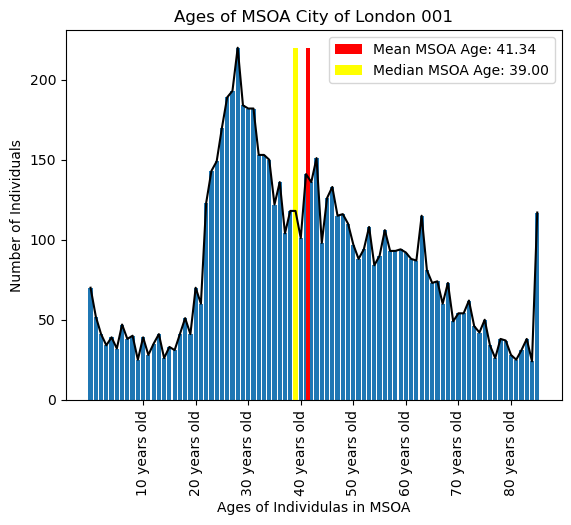

In [159]:
#average age in MSOA
age_vals = list(df_AgeSex_vals.values())
males = np.array(age_vals[::2])
females = np.array(age_vals[1::2])
age_totals = males+females
plt.bar(np.arange(86),age_totals)
plt.xticks([10,20,30,40,50,60,70,80], ('10 years old','20 years old','30 years old','40 years old','50 years old','60 years old','70 years old','80 years old'),rotation = 'vertical')

ages = [age_totals[i] * [str(list(range(86))[i])] for i in range(86)]
ages = [int(i) for i in list(chain.from_iterable(ages))] #excludes over 86 yr olds

plt.bar(np.mean(ages),max(age_totals),color='red',label=f'Mean MSOA Age: {np.mean(ages):.2f}')
plt.bar(np.median(ages),max(age_totals),color='yellow',label = f'Median MSOA Age: {np.median(ages):.2f}')
plt.legend()
plt.plot(np.arange(86),age_totals,color='black')

plt.xlabel('Ages of Individulas in MSOA')
plt.ylabel('Number of Individuals')
plt.title(f'Ages of MSOA {MSOA_name}')
plt.show()

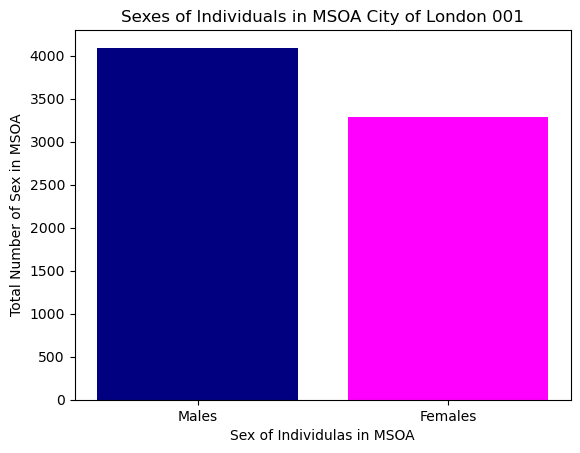

In [160]:
#visualization of sexes in MSOA
age_vals = list(df_AgeSex_vals.values())
males = sum(age_vals[::2])
females = sum(age_vals[1::2])
plt.bar(['Males'],[males],color='navy')
plt.bar(['Females'],[females],color = 'magenta')

plt.xlabel('Sex of Individulas in MSOA')
plt.ylabel('Total Number of Sex in MSOA')
plt.title(f'Sexes of Individuals in MSOA {MSOA_name}')
plt.show()

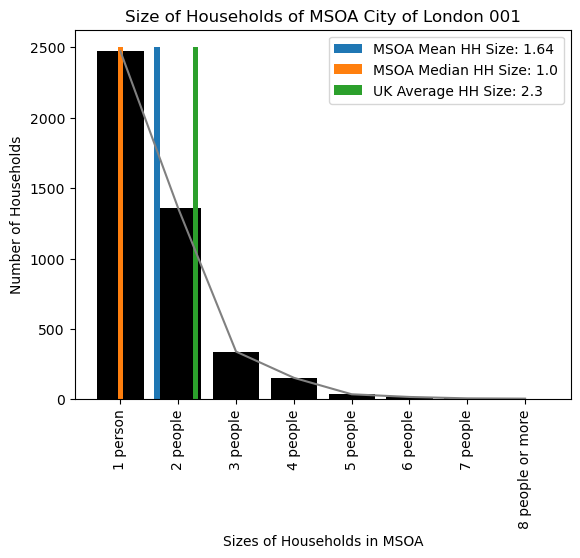

In [161]:
#average HHsize in MSOA vs synthetic pop
plt.plot(['1 person','2 people','3 people','4 people','5 people','6 people','7 people','8 people or more'],df_HHsizes,color = 'gray')
plt.xticks(rotation = 'vertical')
plt.bar(['1 person','2 people','3 people','4 people','5 people','6 people','7 people','8 people or more'],census_HHsizes,color='black')

hhsizes = [i*[j] for i,j in zip(df_HHsizes.values,['1','2','3','4','5','6','7','8'])]
hhsizes = [int(i) for i in list(chain.from_iterable(hhsizes))] 

plt.bar(np.mean(hhsizes)-1,2500,width=0.1,label=f'MSOA Mean HH Size: {np.mean(hhsizes):.2f}')
plt.bar(np.median(hhsizes)-1,2500,width=0.1,label=f'MSOA Median HH Size: {np.median(hhsizes)}')
plt.bar(2.3-1,2500,width=0.1,label=f'UK Average HH Size: 2.3')

plt.legend()
plt.xlabel('Sizes of Households in MSOA')
plt.ylabel('Number of Households')
plt.title(f'Size of Households of MSOA {MSOA_name}')
plt.show()


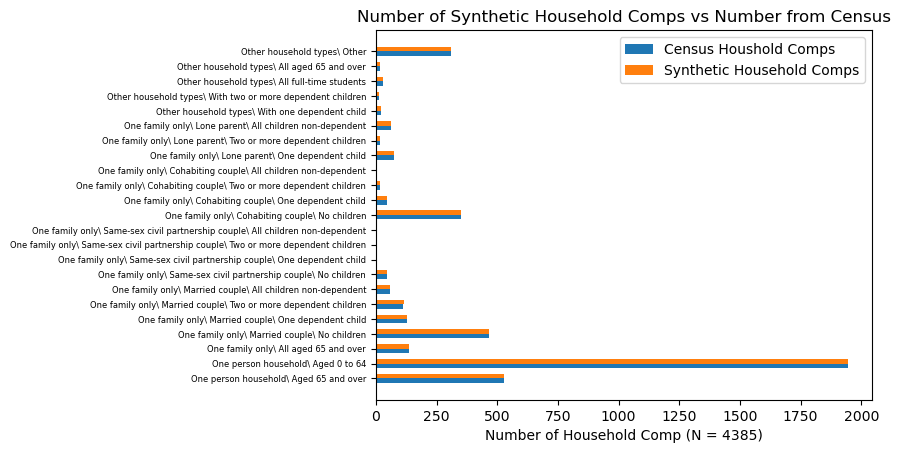

In [162]:
#most common HHcomp in MSOA vs synthetic pop
xaxis = np.arange(len(df_HHcomps))
width = 0.3       
plt.barh(xaxis, census_HHcomps , width, label='Census Houshold Comps')
plt.barh(xaxis + width, df_HHcomps, width, label='Synthetic Household Comps')

plt.xlabel(f'Number of Household Comp (N = {len(df_test)})')
plt.title('Number of Synthetic Household Comps vs Number from Census')

comp_list = []
for i in list(get_household_by_composition(MsoaData.household_comp).columns[3:]):
    comp_list.append((i[24:-20]))
plt.yticks(xaxis + width / 2,(comp_list),fontsize=6)

plt.legend()
plt.show()

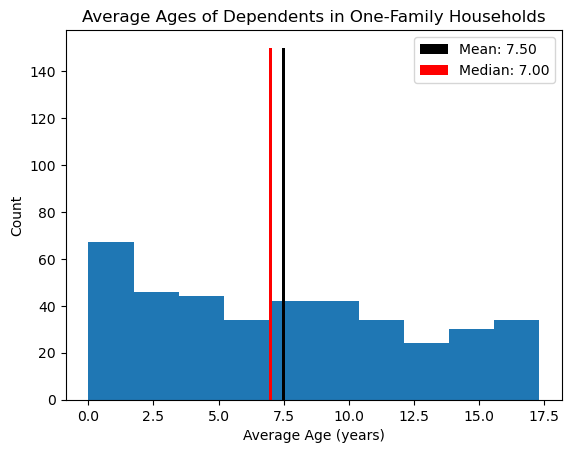

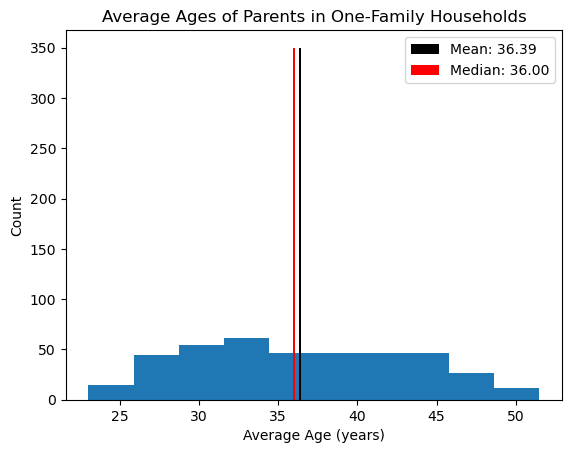

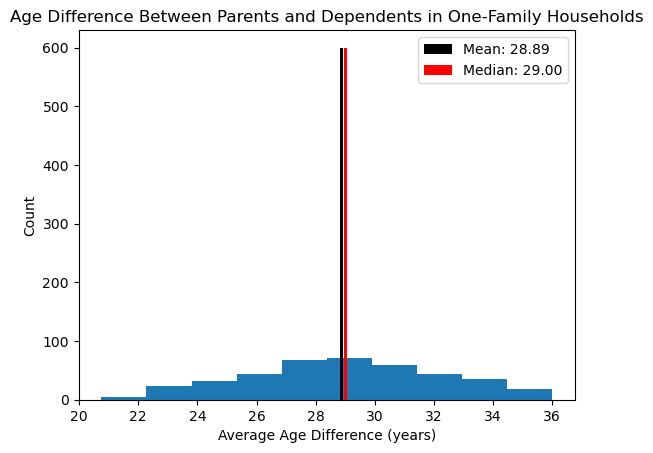

In [163]:
#average age of parents compared to kids in dependent HHs
averages_dependents = []
averages_parents = []
differences = []



for i in range(len(df_test)):
    ages_results = []
    if (' dependent' in df_test['Household Composition'][i]) and (('One family' in df_test['Household Composition'][i])):
        ages_results.append(df_test['Individual 1'][i][10:12].strip()) #always a dependent
        ages_results.append(df_test['Individual 2'][i][10:12].strip()) #always a parent
        ages_results.append(df_test['Individual 3'][i][10:12].strip()) #always a parent
        ages_results.append(df_test['Individual 4'][i][10:12].strip())
        ages_results.append(df_test['Individual 5'][i][10:12].strip())
        ages_results.append(df_test['Individual 6'][i][10:12].strip())
        ages_results.append(df_test['Individual 7'][i][10:12].strip())
        
        if type(df_test['Individual 8'][i]) == list:
            for j in df_test['Individual 8'][i]:
                ages_results.append(j[10:12].strip())
            df_test['Individual 8'][i]
        else:   
            ages_results.append(df_test['Individual 8'][i][10:12].strip())
        for k in ages_results:    
            if 'un' in k:
                indx = ages_results.index(k)
                ages_results[indx] = '0'
        ages_results = list(filter(('').__ne__, ages_results)) #removes all blank values

        depend_ages = []
        parent_ages = []
        for x in ages_results:
            if int(x) <= 18:
                depend_ages.append(int(x))
            else:
                parent_ages.append(int(x))
                
        avg_depend_age = sum(depend_ages)/len(depend_ages)
        avg_parent_age = sum(parent_ages)/len(parent_ages)
        diff = avg_parent_age-avg_depend_age
        #print(f'Household size: {len(ages_results)}',f'Average parent age: {avg_parent_age}',f'Average dependent age: {avg_depend_age}',f'Difference between: {diff}')
        averages_dependents.append(avg_depend_age)
        averages_parents.append(avg_parent_age)
        differences.append(diff)

plt.hist(averages_dependents)
plt.bar(np.mean(averages_dependents),150,width = 0.1, color = 'black',label = f'Mean: {np.mean(averages_dependents):.2f}')
plt.bar(np.median(averages_dependents),150,width = 0.1, color = 'red',label = f'Median: {np.median(averages_dependents):.2f}')
plt.title('Average Ages of Dependents in One-Family Households')
plt.xlabel('Average Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.hist(averages_parents)
plt.bar(np.mean(averages_parents),350,width = 0.1, color = 'black',label = f'Mean: {np.mean(averages_parents):.2f}')
plt.bar(np.median(averages_parents),350,width = 0.1, color = 'red',label = f'Median: {np.median(averages_parents):.2f}')
plt.title('Average Ages of Parents in One-Family Households')
plt.xlabel('Average Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.hist(differences)
plt.bar(np.mean(differences),600,width = 0.1, color = 'black',label = f'Mean: {np.mean(differences):.2f}')
plt.bar(np.median(differences),600,width = 0.1, color = 'red',label = f'Median: {np.median(differences):.2f}')
plt.title('Age Difference Between Parents and Dependents in One-Family Households')
plt.xlabel('Average Age Difference (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

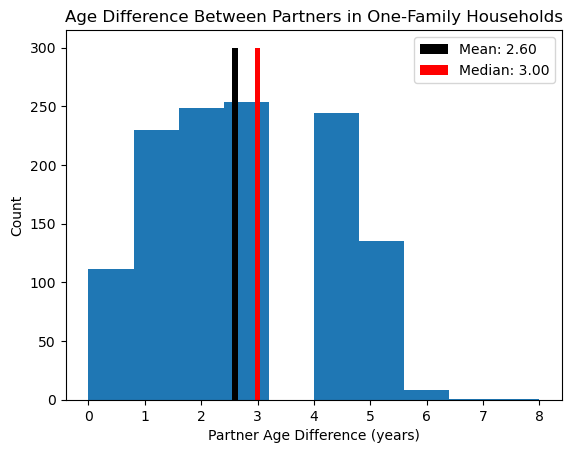

In [164]:
#average age difference between partners (in one family HHs?)

partners_diff = []
for i in range(len(df_test)):
    adult_ages = []
    if (('dependent' in df_test['Household Composition'][i]) or ('No children' in df_test['Household Composition'][i])) and ('Lone' not in df_test['Household Composition'][i]) and (('One family' in df_test['Household Composition'][i])):
        if 'No children' in df_test['Household Composition'][i]:
            adult_ages.append(int(df_test['Individual 1'][i][10:12].strip()))
            adult_ages.append(int(df_test['Individual 2'][i][10:12].strip()))
        else:
            adult_ages.append(int(df_test['Individual 2'][i][10:12].strip())) #always a parent
            adult_ages.append(int(df_test['Individual 3'][i][10:12].strip())) #always a parent
        partners_diff.append(abs(adult_ages[0]-adult_ages[1]))
    
plt.hist(partners_diff)  
plt.bar(np.mean(partners_diff),300,width = 0.1, color = 'black',label = f'Mean: {np.mean(partners_diff):.2f}')
plt.bar(np.median(partners_diff),300,width = 0.1, color = 'red',label = f'Median: {np.median(partners_diff):.2f}')
plt.title('Age Difference Between Partners in One-Family Households')
plt.xlabel('Partner Age Difference (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

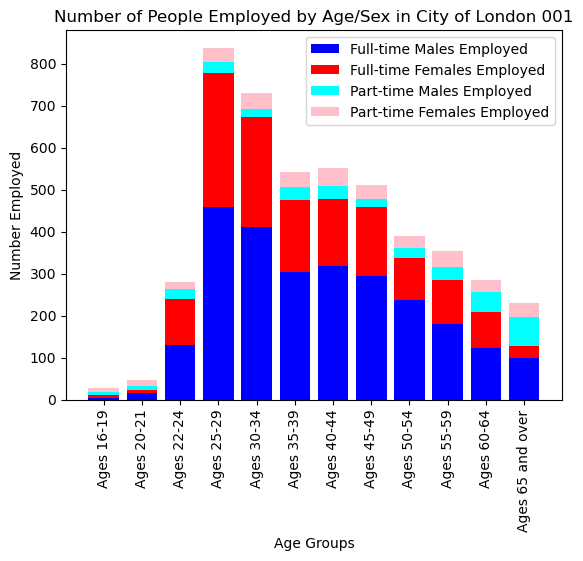

In [170]:
#total employed people in df vs national avg
labels = ['Ages 16-19','Ages 20-21','Ages 22-24','Ages 25-29','Ages 30-34','Ages 35-39','Ages 40-44','Ages 45-49','Ages 50-54','Ages 55-59','Ages 60-64','Ages 65 and over']
full_time_males = list(df_Emply_vals.values())[2::4]
full_time_females = list(df_Emply_vals.values())[3::4]
part_time_males = list(df_Emply_vals.values())[0::4]
part_time_females = list(df_Emply_vals.values())[1::4]

plt.bar(labels, full_time_males, color='blue')
plt.bar(labels, full_time_females, bottom=full_time_males, color='red')
plt.bar(labels, part_time_males, bottom=np.array(full_time_males)+np.array(full_time_females), color='cyan')
plt.bar(labels, part_time_females, bottom=np.array(full_time_males)+np.array(full_time_females)+np.array(part_time_males), color='pink')

plt.xticks(rotation='vertical')

plt.xlabel('Age Groups')
plt.ylabel('Number Employed')
plt.legend(['Full-time Males Employed','Full-time Females Employed','Part-time Males Employed','Part-time Females Employed'])
plt.title(f'Number of People Employed by Age/Sex in {MSOA_name}')
plt.show()
